# Prediction of Healthy Bank 

## Callista Ivana Mogie
## 2402225420

In [243]:
# import necessary module/package

## dataset Manipulation Module/package
import pandas as pd
import numpy as np

## Graph module/package|
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

## Model Creation module
from imblearn import under_sampling, over_sampling
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree, svm
import graphviz 

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from ann_visualizer.visualize import ann_viz

## Evaluation Module 
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


# dataset Understanding

### 1. Import dataset and understand dataset

In [13]:
# Import and read dataset
# Get dataset shape
dataset = pd.read_csv("data.csv")
dataset.shape

# there is 6819 dataset with 96 attributes

(6819, 96)

In [4]:
dataset.tail(2)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6817                                           0.565302                   1   
6818                                           0.565167                   1   

       Equity to Liability  
6817              0.044009  
6818              0.233902  

[2 rows x 96 columns]

In [5]:
dataset.head(2)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   

    ROA(B) before interest and depreciation after tax  \
0                                            0.40575    
1                                            0.51673    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   

    Equity to Liability  
0              0.016469  
1              0.020794  

[2 rows x 96 columns]

In [6]:
# displaying the list of column names

list_of_column_names = list(dataset.columns)
print(list_of_column_names)

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

In [7]:
dataset.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

### 2. Get dataset Correlation, to see connection between attributes

In [8]:
dataset_correlation = dataset.corr()
dataset_correlation

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

### 3. Check If dataset Balance or Not

In [9]:
total_dataset = len(dataset)
bankrupt_dataset = dataset['Bankrupt?'].value_counts()

percentage_bankrupt_true = bankrupt_dataset[1] / total_dataset * 100
percentage_bankrupt_false = bankrupt_dataset[0] / total_dataset * 100

print('total dataset: {0} dataset'.format(total_dataset))
print('Percentage of Bankruptcy dataset: Yes = {0}% and {1}% not Bankruptcy'.format(percentage_bankrupt_true, percentage_bankrupt_false))

total dataset: 6819 dataset
Percentage of Bankruptcy dataset: Yes = 3.2262795131250916% and 96.77372048687491% not Bankruptcy


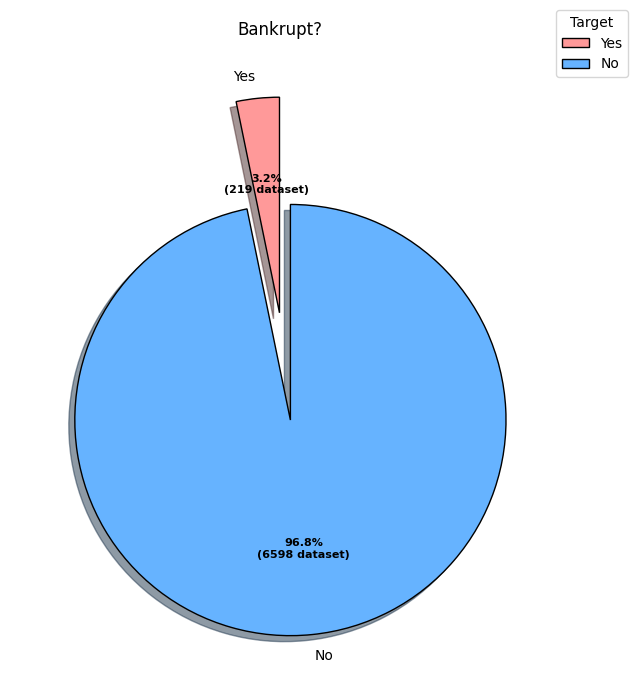

In [10]:
# Creating target
target = ['Yes', 'No']
 
# Creating target value
dataset = [bankrupt_dataset[1], bankrupt_dataset[0]]

# Creating explode dataset
explode = (0.0, 0.5)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# set color
colors = ['#ff9999','#66b3ff']
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} dataset)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(dataset,
                                  colors = colors,
                                  autopct = lambda pct: func(pct, dataset),
                                  explode = explode,
                                  labels = target,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="Black"))
 
# Adding legend
ax.legend(wedges, target,
          title ="Target",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Bankrupt?")
 
# show plot
plt.show()

#### Note: Dari chart dapat disimpulkan bahwa, datasetset sangat tidak balance, dimana, dari 6819 terdapat 6598 (96.8%) dataset bank yang tidak bankrut dan hanya terdapat 219 (3.2%) dataset bank yang bangkrut. 

# dataset Preprocessing

## 1. Remove Useless Attributes

In [14]:
columns = [
' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax',
' ROA(B) before interest and depreciation after tax',' Realized Sales Gross Margin', ' Operating Profit Rate',
' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Net Value Per Share (B)', ' Net Value Per Share (A)',
' Net Value Per Share (C)', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)',
' Per Share Net profit before tax (Yuan ¥)', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate',
' Cash/Total Assets', ' Quick Assets/Current Liability', ' Cash/Current Liability',
' Inventory/Current Liability', ' Liability-Assets Flag', ' Gross Profit to Sales',
' Net Income Flag', ' Current Liability to Equity',
]


dataset = dataset.drop(columns,axis=1)

In [15]:
print(list(dataset.columns))

['Bankrupt?', ' Operating Gross Margin', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Ave

### New Dataset Correlation

In [16]:
dataset_correlation = dataset.corr()
dataset_correlation

Bankrupt?  \
Bankrupt?                                            1.000000   
 Operating Gross Margin                             -0.100043   
 Non-industry income and expenditure/revenue        -0.016593   
 Continuous interest rate (after tax)               -0.008395   
 Operating Expense Rate                             -0.006083   
...                                                       ...   
 Net Income to Stockholder's Equity                 -0.180987   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Equity to Liability                                -0.083048   

                                                     Operating Gross Margin  \
Bankrupt?                                                         -0.100043   
 Operating Gross Margin                                            1.000000   
 Non-industry income and expenditure/revenue                       0.051438   
 Continuous interest rate (after tax)                              0.029430   
 Operating Expense Rate                                           -0.206353   
...                                                                     ...   
 Net Income to Stockholder's Equity                                0.075304   
 Liability to Equity                                              -0.085434   
 Degree of Financial Leverage (DFL)                               -0.011806   
 Interest Coverage Ratio (Interest expense to E...                -0.001167   
 Equity to Liability                                               0.120029   

                                                     Non-industry income and expenditure/revenue  \
Bankrupt?                                                                              -0.016593   
 Operating Gross Margin                                                                 0.051438   
 Non-industry income and expenditure/revenue                                            1.000000   
 Continuous interest rate (after tax)                                                  -0.230698   
 Operating Expense Rate                                                                -0.003597   
...                                                                                          ...   
 Net Income to Stockholder's Equity                                                     0.007693   
 Liability to Equity                                                                   -0.011899   
 Degree of Financial Leverage (DFL)                                                    -0.000556   
 Interest Coverage Ratio (Interest expense to E...                                      0.001024   
 Equity to Liability                                                                    0.012293   

                                                     Continuous interest rate (after tax)  \
Bankrupt?                                                                       -0.008395   
 Operating Gross Margin                                                          0.029430   
 Non-industry income and expenditure/revenue                                    -0.230698   
 Continuous interest rate (after tax)                                            1.000000   
 Operating Expense Rate                                                          0.013168   
...                                                                                   ...   
 Net Income to Stockholder's Equity                                              0.011191   
 Liability to Equity                                                            -0.002996   
 Degree of Financial Leverage (DFL)                                              0.000774   
 Interest Coverage Ratio (Interest expense to E...                               0.000798   
 Equity to Liability                                                            -0.011299   

    

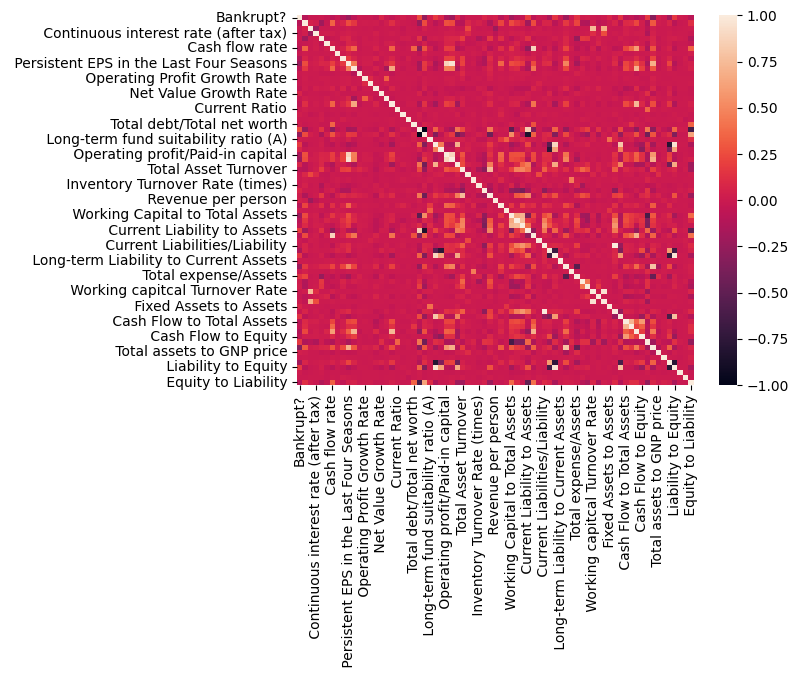

In [17]:
corr = dataset.corr()
sns.heatmap(corr);

<AxesSubplot: >

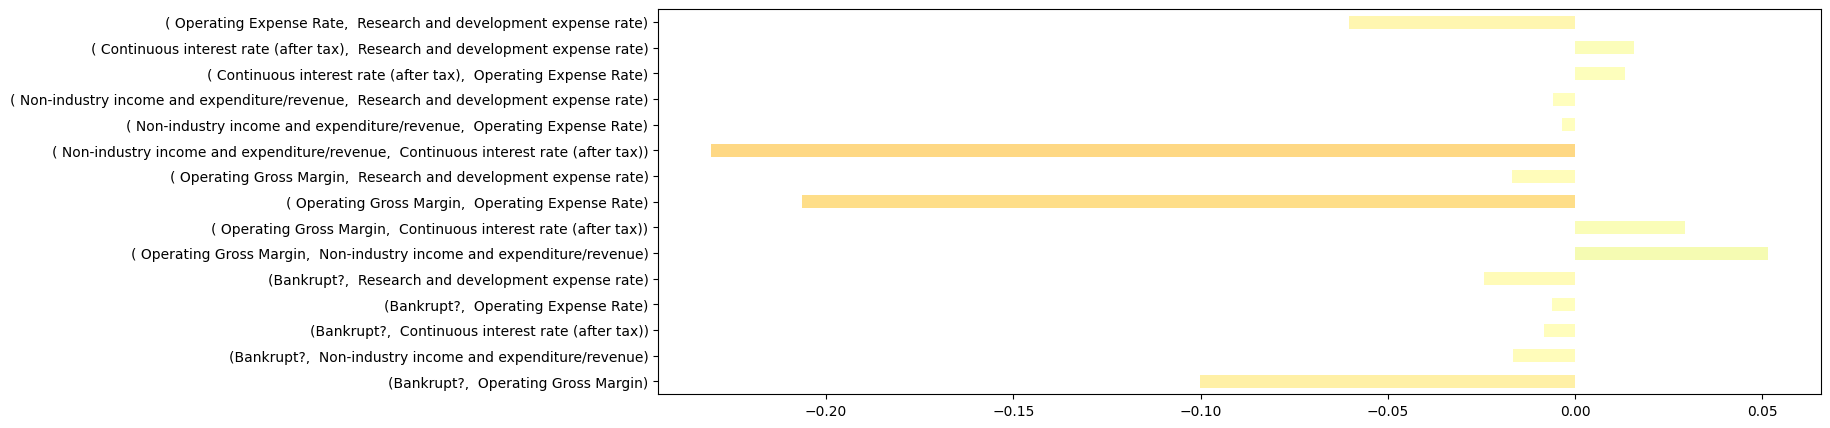

In [18]:
# Because the attributes is too much too handle 
# Choose variable columns manually to get data correlation for each feature and to label

df = dataset
columns=['Bankrupt?',  ' Operating Gross Margin', ' Non-industry income and expenditure/revenue', 
         ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', 
         ]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop)
    return au_corr

corrplot = get_correlations(df[columns])

fig, ax = plt.subplots(figsize =(15,5))

norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]

corrplot.plot.barh(color=colors) 

In [19]:
df = dataset
df.shape[1]
df[df.columns[0:df.shape[1]]].corr()['Bankrupt?']

Bankrupt?                                              1.000000
 Operating Gross Margin                               -0.100043
 Non-industry income and expenditure/revenue          -0.016593
 Continuous interest rate (after tax)                 -0.008395
 Operating Expense Rate                               -0.006083
                                                         ...   
 Net Income to Stockholder's Equity                   -0.180987
 Liability to Equity                                   0.166812
 Degree of Financial Leverage (DFL)                    0.010508
 Interest Coverage Ratio (Interest expense to EBIT)   -0.005509
 Equity to Liability                                  -0.083048
Name: Bankrupt?, Length: 73, dtype: float64

In [304]:
df_corr = df[df.columns[0:df.shape[1]]].corr()['Bankrupt?']
highest_corr = []
temp = 0.13

# for i in range(len(df_corr)):
#     dict = {df.columns[i]:df_corr[i]}
#     highest_corr.append(dict)
        
for i in range(len(df_corr)):
    if temp < df_corr[i]: 
        dict = {df.columns[i]:df_corr[i]}
        highest_corr.append(dict)

highest_corr

[{'Bankrupt?': 1.0},
 {' Debt ratio %': 0.25016096206661775},
 {' Borrowing dependency': 0.1765429361615994},
 {' Current Liability to Assets': 0.19449443585543952},
 {' Current Liabilities/Equity': 0.1538283619069691},
 {' Total expense/Assets': 0.13904921596620506},
 {' Equity to Long-term Liability': 0.139013572544475},
 {' Current Liability to Current Assets': 0.17130604352180528},
 {' Liability to Equity': 0.16681209778111403}]

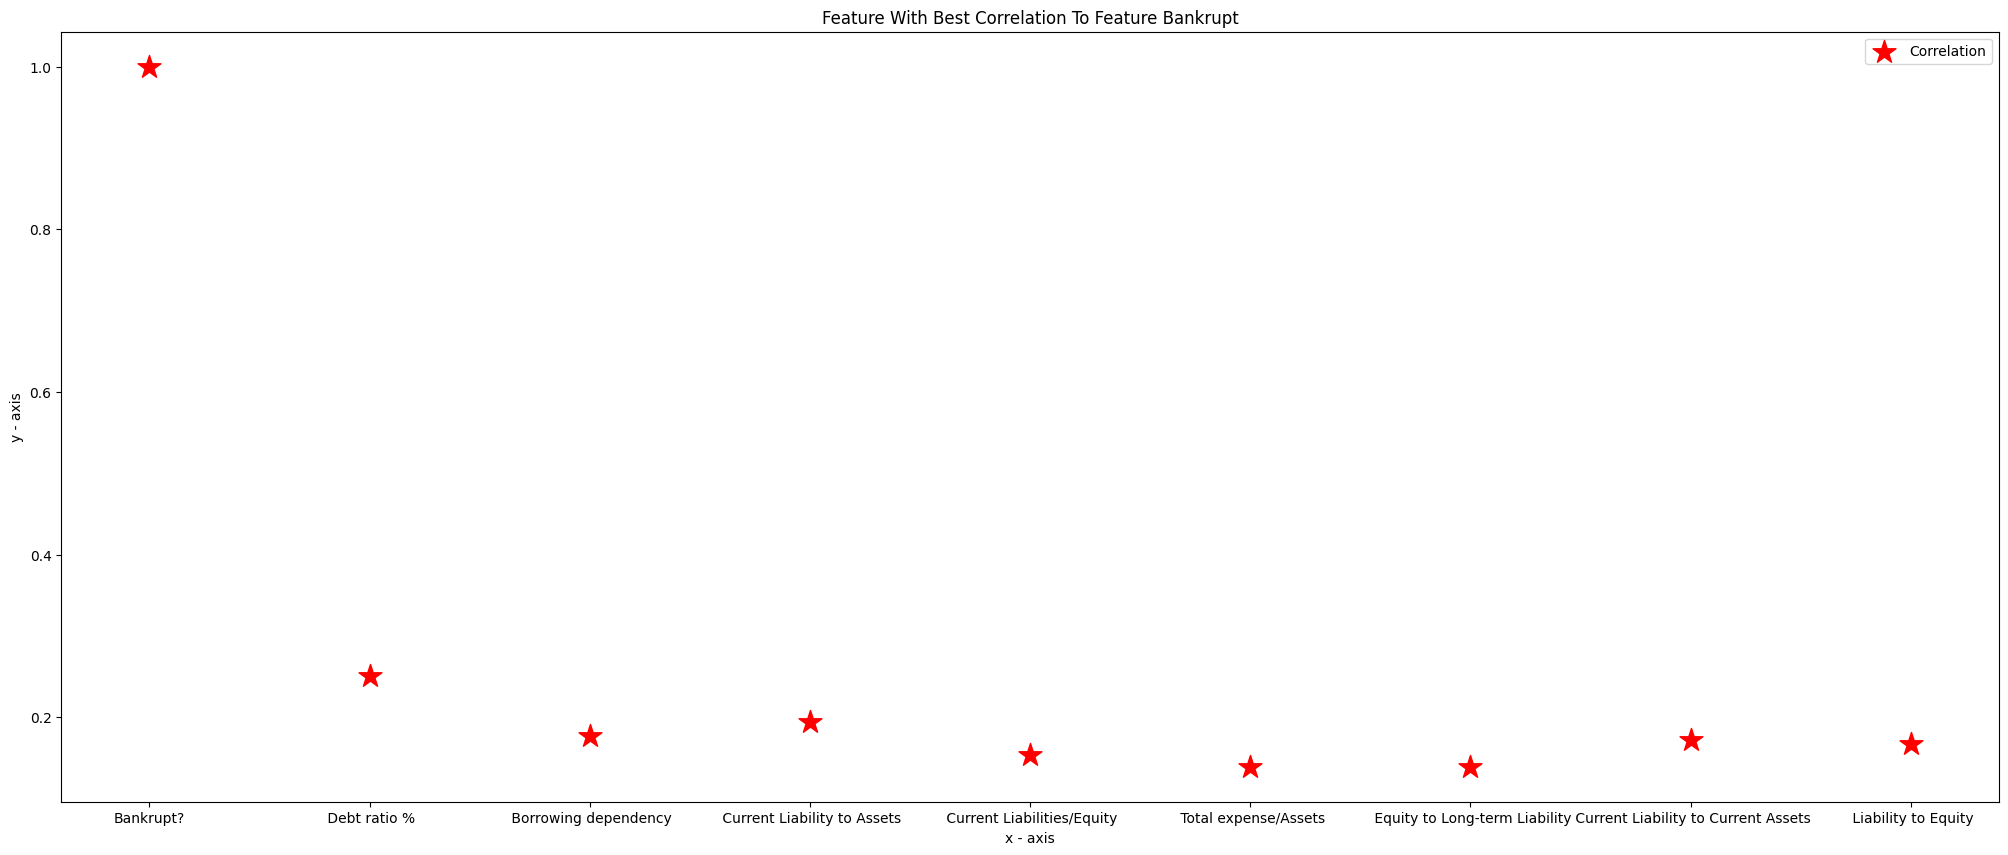

In [31]:
x = []
y = []
temp = 0.13

for i in range(len(df_corr)):
    if temp < df_corr[i]: 
        x.append(df.columns[i])
        y.append(df_corr[i])

# plotting points as a scatter plot
plt.scatter(x, y, label= "Correlation", color= "Red", 
            marker= "*", s=300)
plt.gcf().set_size_inches((25, 10))
  
# x-axis label
plt.xlabel('x - axis')
# frequency label
plt.ylabel('y - axis')
# plot title
plt.title('Feature With Best Correlation To Feature Bankrupt')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()


array([[<AxesSubplot: title={'center': 'Bankrupt?'}>,
        <AxesSubplot: title={'center': ' Operating Gross Margin'}>,
        <AxesSubplot: title={'center': ' Non-industry income and expenditure/revenue'}>,
        <AxesSubplot: title={'center': ' Continuous interest rate (after tax)'}>,
        <AxesSubplot: title={'center': ' Operating Expense Rate'}>,
        <AxesSubplot: title={'center': ' Research and development expense rate'}>,
        <AxesSubplot: title={'center': ' Cash flow rate'}>,
        <AxesSubplot: title={'center': ' Interest-bearing debt interest rate'}>,
        <AxesSubplot: title={'center': ' Tax rate (A)'}>],
       [<AxesSubplot: title={'center': ' Persistent EPS in the Last Four Seasons'}>,
        <AxesSubplot: title={'center': ' Cash Flow Per Share'}>,
        <AxesSubplot: title={'center': ' Realized Sales Gross Profit Growth Rate'}>,
        <AxesSubplot: title={'center': ' Operating Profit Growth Rate'}>,
        <AxesSubplot: title={'center': ' Contin

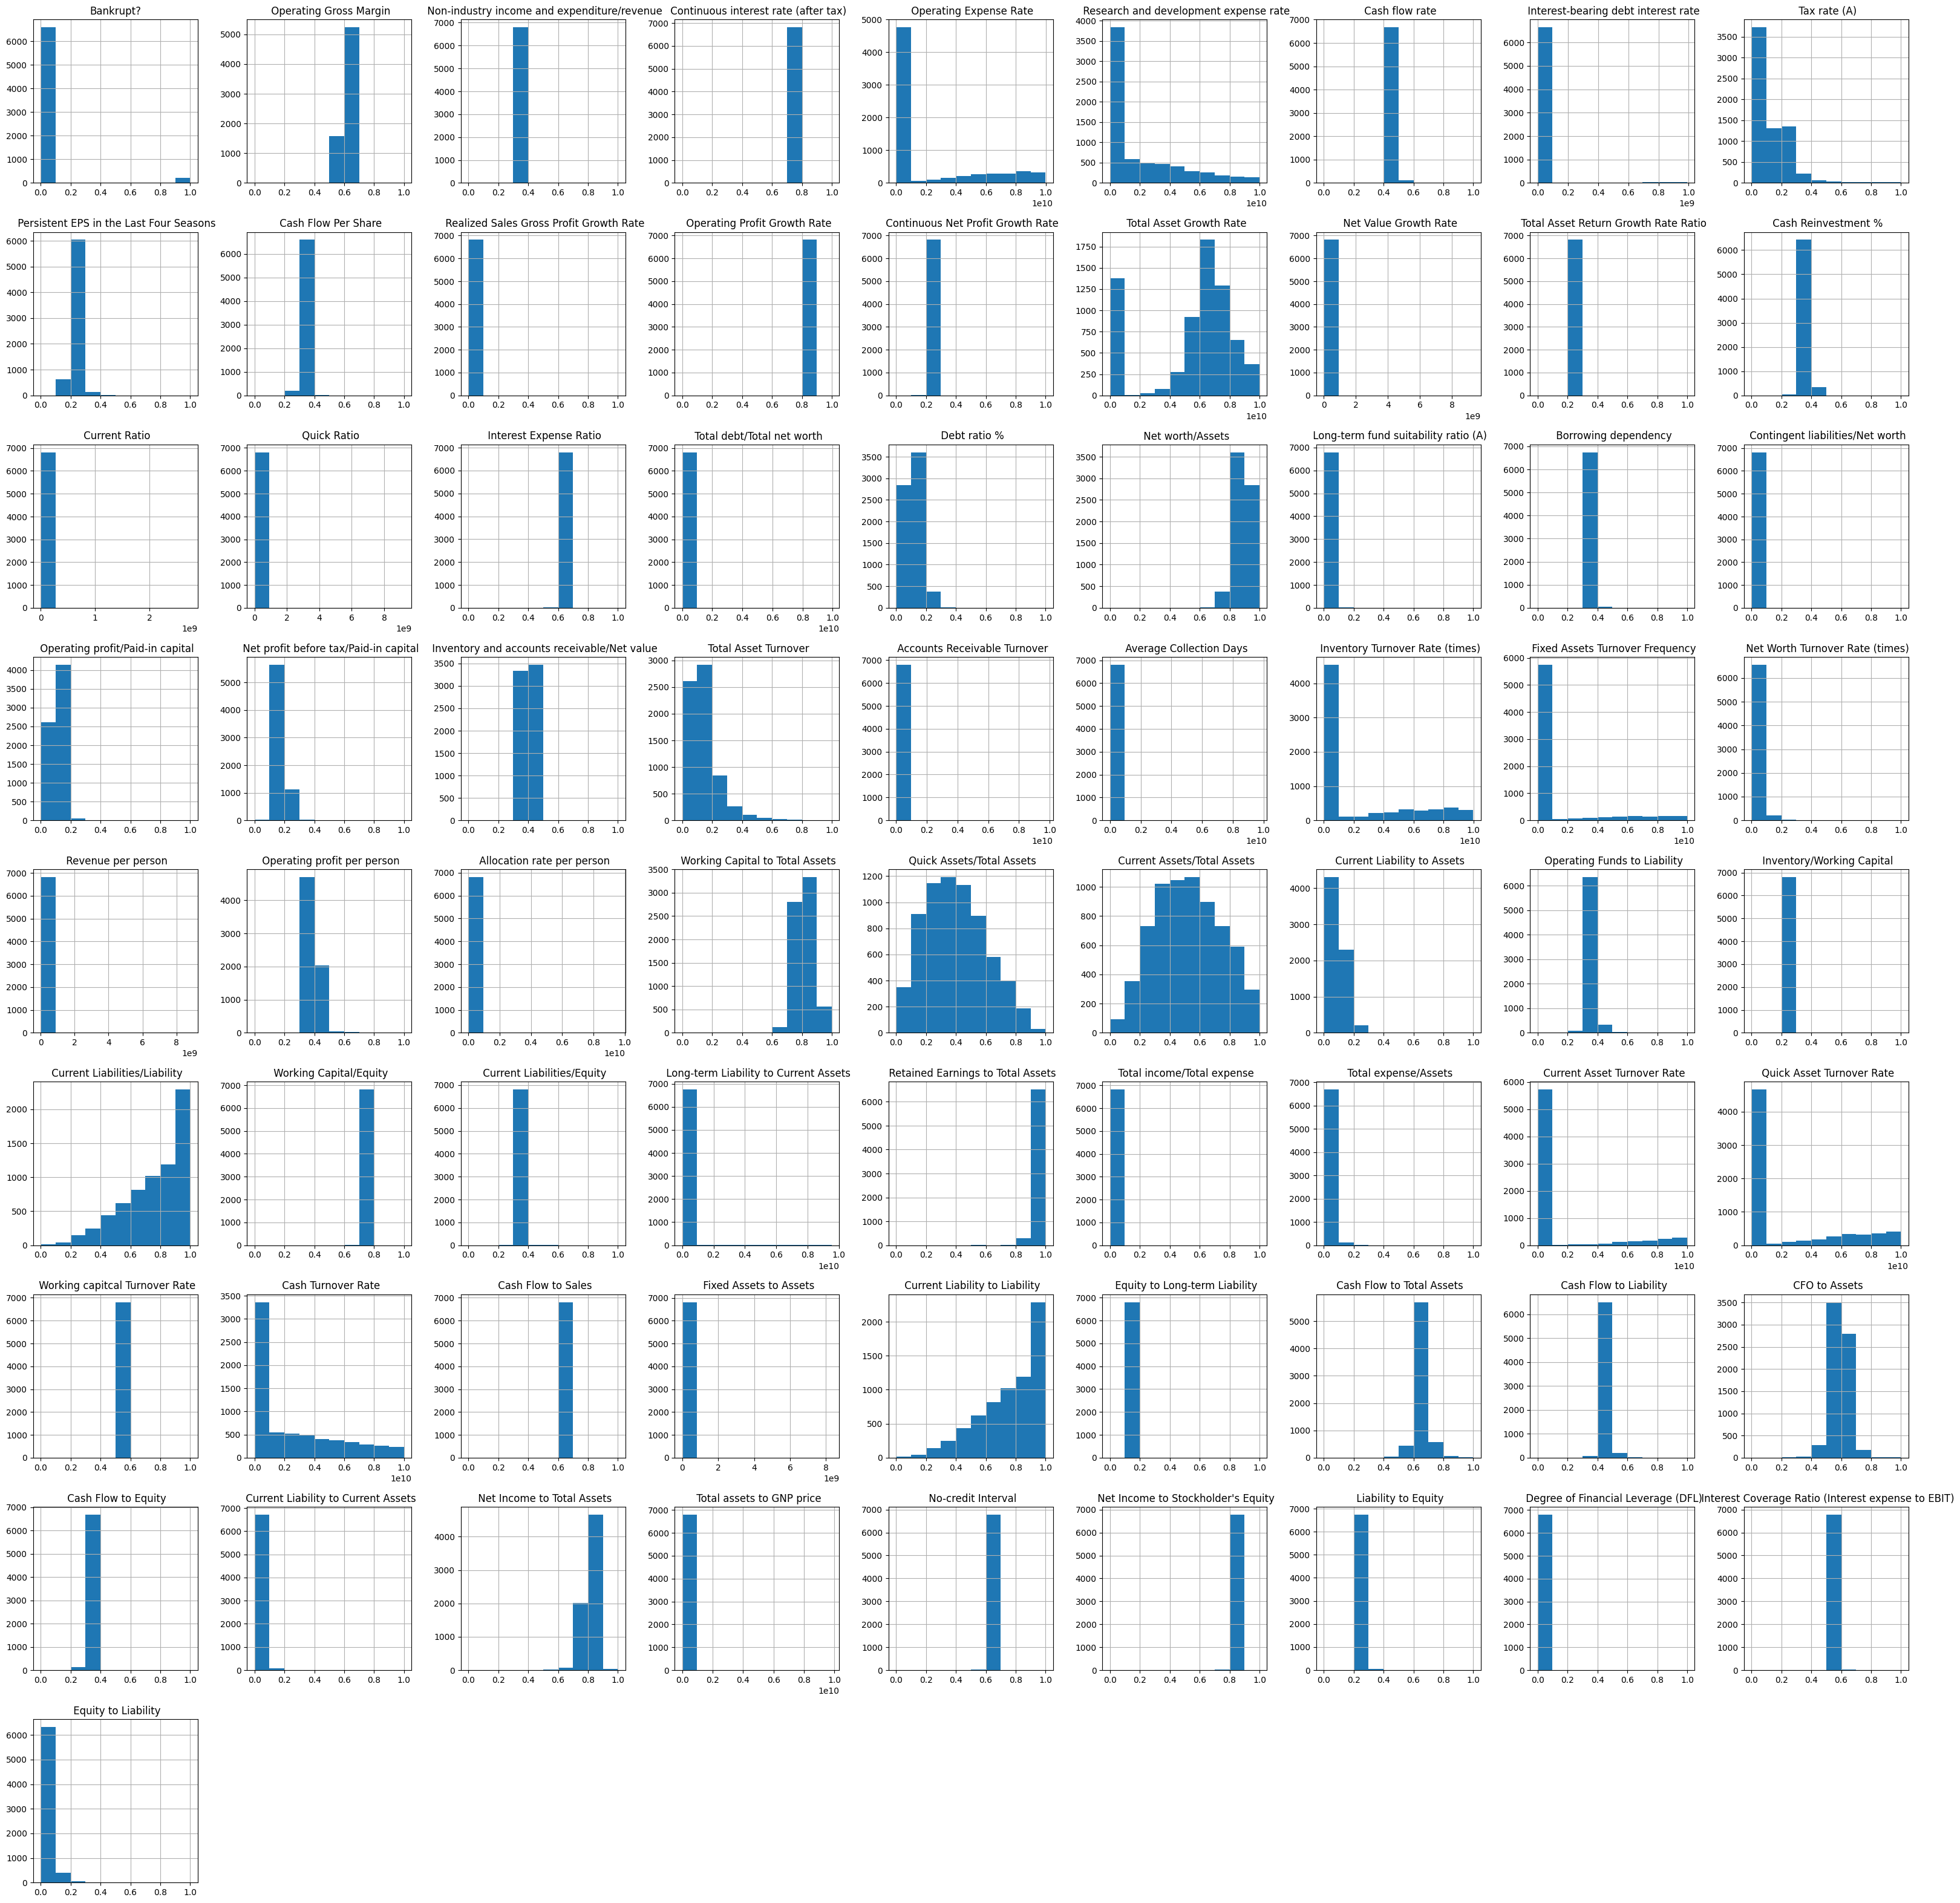

In [32]:
dataset.hist(figsize = (40,40))

### 1x Fitur yang pertama adalah fitur Net Income To Total Assets

Text(0.5, 1.0, 'Relationship between bankrupt events and Debt ratio %')

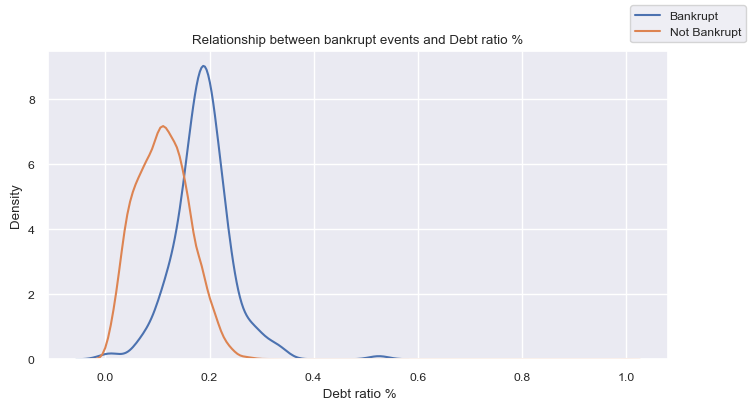

In [303]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Debt ratio %'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Debt ratio %'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Debt ratio %')

### 2x. Fitur yang ke-dua adalah fitur Current Liability to Asset

Text(0.5, 1.0, 'Relationship between bankrupt events and Current Liability to Assets')

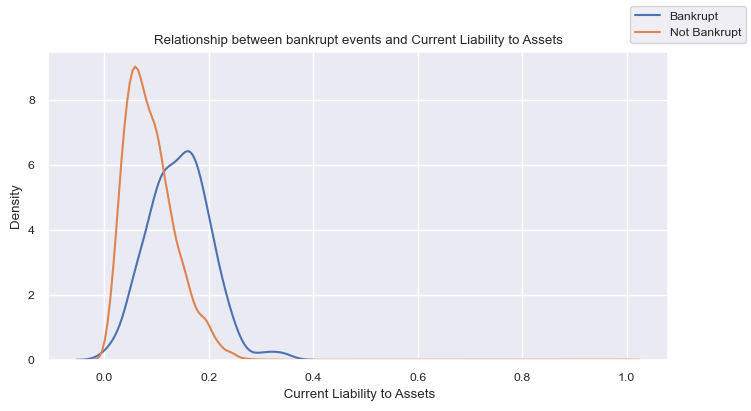

In [306]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Current Liability to Assets'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Current Liability to Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Current Liability to Assets')

### 3x. Fitur yang ke-tiga adalah fitur Borrowing dependency

Text(0.5, 1.0, 'Relationship between bankrupt events and Borrowing dependency')

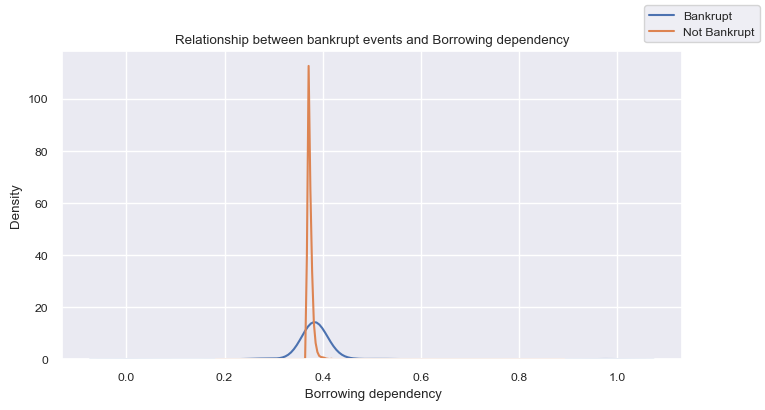

In [307]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Borrowing dependency'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Borrowing dependency'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Borrowing dependency')

### 4x. Fitur yang ke empat adalah Current Liability to Current Assets

Text(0.5, 1.0, 'Relationship between bankrupt events and Current Liability to Current Assets')

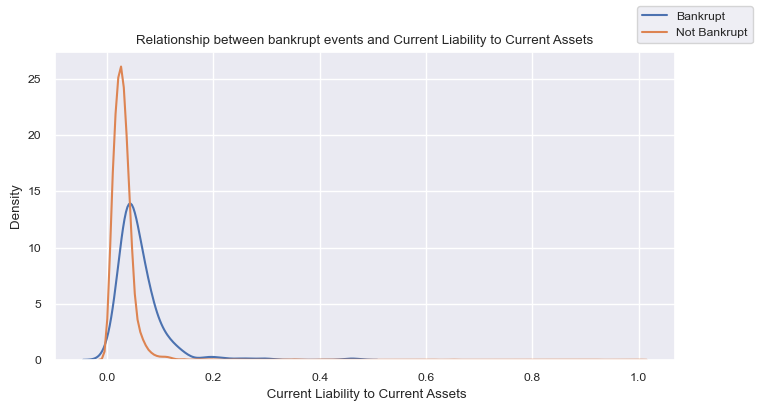

In [308]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Current Liability to Current Assets'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Current Liability to Current Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Current Liability to Current Assets')

### 5x. Fitur yang ke-lima adalah Liability to Equity

Text(0.5, 1.0, 'Relationship between bankrupt events and Liability to Equity')

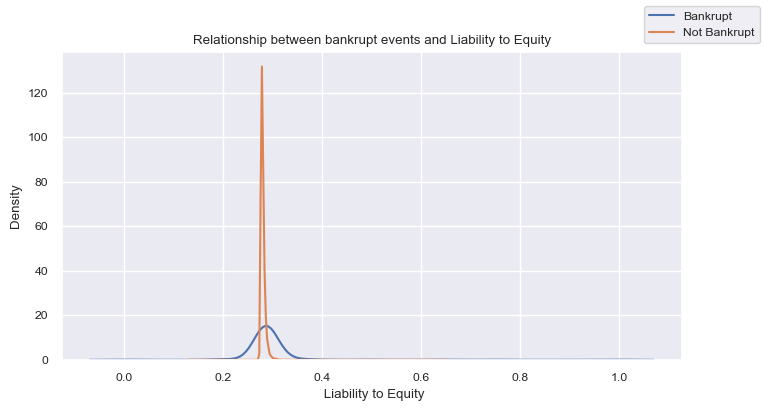

In [309]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Liability to Equity'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Liability to Equity'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Liability to Equity')

### Current Liabilities/Equity

Text(0.5, 1.0, 'Relationship between bankrupt events and Current Liabilities/Equity')

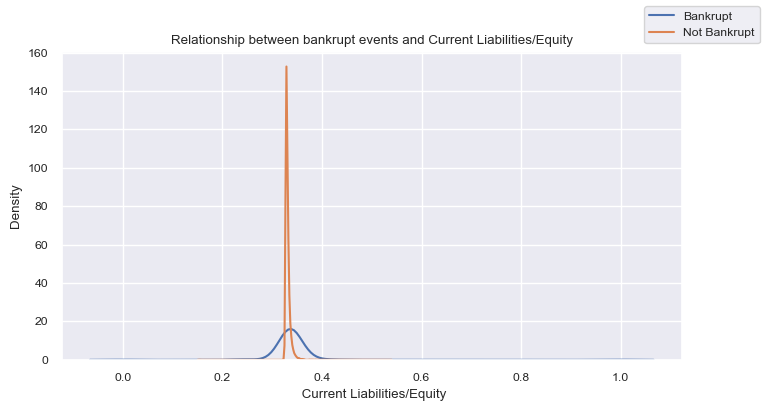

In [310]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Current Liabilities/Equity'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Current Liabilities/Equity'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Current Liabilities/Equity')

Text(0.5, 1.0, 'Relationship between bankrupt events and Liability to Equity')

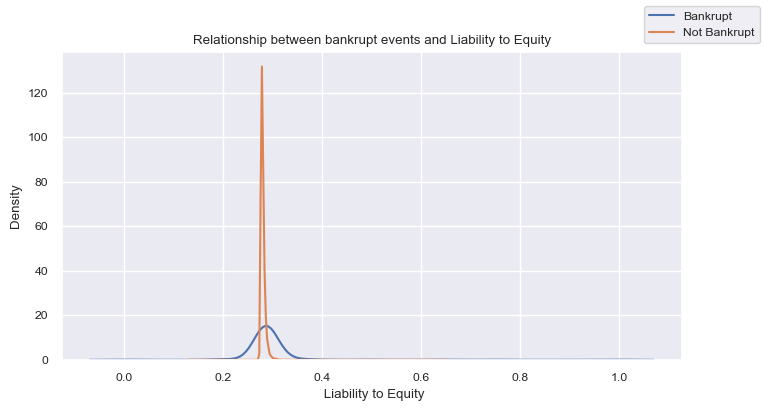

In [278]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(dataset[dataset['Bankrupt?']==1][' Liability to Equity'])
sns.kdeplot(dataset[dataset['Bankrupt?']==0][' Liability to Equity'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Liability to Equity')

## 2. Remove Null Values

In [33]:
dataset.isnull().sum()

Bankrupt?                                              0
 Operating Gross Margin                                0
 Non-industry income and expenditure/revenue           0
 Continuous interest rate (after tax)                  0
 Operating Expense Rate                                0
                                                      ..
 Net Income to Stockholder's Equity                    0
 Liability to Equity                                   0
 Degree of Financial Leverage (DFL)                    0
 Interest Coverage Ratio (Interest expense to EBIT)    0
 Equity to Liability                                   0
Length: 73, dtype: int64

In [34]:
dataset.isnull().any()

Bankrupt?                                              False
 Operating Gross Margin                                False
 Non-industry income and expenditure/revenue           False
 Continuous interest rate (after tax)                  False
 Operating Expense Rate                                False
                                                       ...  
 Net Income to Stockholder's Equity                    False
 Liability to Equity                                   False
 Degree of Financial Leverage (DFL)                    False
 Interest Coverage Ratio (Interest expense to EBIT)    False
 Equity to Liability                                   False
Length: 73, dtype: bool

<AxesSubplot: >

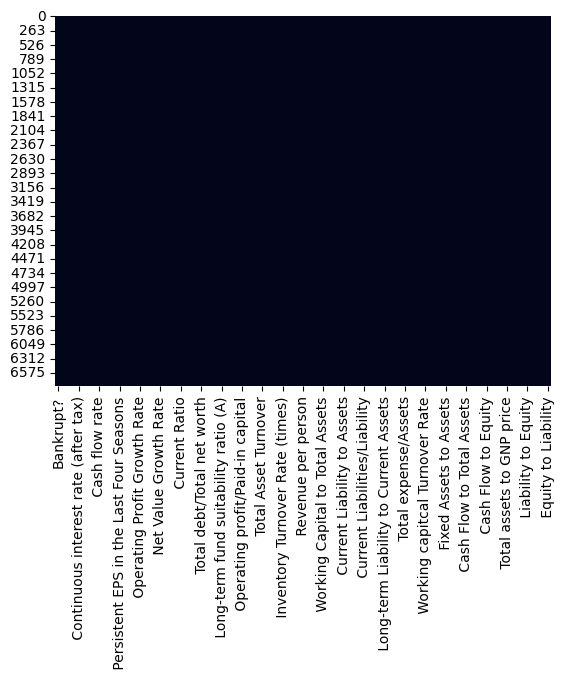

In [35]:
sns.heatmap(dataset.isnull(), cbar=False)

## Dataset Tidak Null, Akan tetapi terdapat incosistensi penulisan dataset
## Sehingga dilakukan perbaikan terhadap inconsistensi dataset

### Dataset dengan penulisan inconesitency yang pertama adalah tax rate (A)

In [36]:
dataset[' Tax rate (A)'].value_counts()

0.000000    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

In [37]:
std = dataset[' Tax rate (A)'].std()
std

0.13866749672835132

In [38]:
# define list
dataset[' Tax rate (A)'] = dataset[' Tax rate (A)']
  
for i in range(len(dataset[' Tax rate (A)'])):
    if dataset[' Tax rate (A)'][i] == 0.0:
        dataset[' Tax rate (A)'][i] = std
        
# print list
dataset[' Tax rate (A)'].value_counts()


C:\Users\User\AppData\Local\Temp\ipykernel_29692\2692420800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Tax rate (A)'][i] = std


0.138667    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

#### Dataset dengan inconsistency yang kedua adalah Long-term liability to current assets

In [39]:
dataset[' Long-term Liability to Current Assets'].value_counts()

0.000000e+00    2569
5.790000e+08       2
2.790000e+08       2
2.559237e-02       1
2.268326e-02       1
                ... 
3.255339e-03       1
2.278838e-03       1
3.893648e-03       1
1.029732e-03       1
3.200000e+09       1
Name:  Long-term Liability to Current Assets, Length: 4249, dtype: int64

In [40]:
# for i in dataset[' Long-term Liability to Current Assets']:
#     print(i)

In [41]:
def converting_number(number): 
    len_number = len(number) - 2
    float_number = int(len_number) * '0'
    float_number = '10' + float_number
    int_number = int(float(number))
    x = int_number * (1 / int(float_number))
    return x

In [42]:
dataset[' Long-term Liability to Current Assets'] = dataset[' Long-term Liability to Current Assets']

for i in range(len(dataset[' Long-term Liability to Current Assets'])):
    if str(dataset[' Long-term Liability to Current Assets'][i]).startswith('0') == False:
        temp = dataset[' Long-term Liability to Current Assets'][i]
        dataset[' Long-term Liability to Current Assets'][i] = converting_number(str(temp))

C:\Users\User\AppData\Local\Temp\ipykernel_29692\3840535893.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Long-term Liability to Current Assets'][i] = converting_number(str(temp))


In [43]:
std = dataset[' Long-term Liability to Current Assets'].std()
std

0.016903218472478467

In [44]:
for i in range(len(dataset[' Long-term Liability to Current Assets'])):
    if dataset[' Long-term Liability to Current Assets'][i] == 0.0:
        dataset[' Long-term Liability to Current Assets'][i] = std
        
# print list
dataset[' Tax rate (A)'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_29692\3861313832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Long-term Liability to Current Assets'][i] = std


0.138667    2568
0.253062       7
0.000405       7
0.113777       6
0.252657       6
            ... 
0.405810       1
0.208827       1
0.259540       1
0.029963       1
0.490839       1
Name:  Tax rate (A), Length: 2488, dtype: int64

#### Dataset dengan inconsistency yang ketiga adalah Operating Expense Rate

In [45]:
dataset[' Operating Expense Rate'].value_counts()

5.530000e+09    10
9.860000e+09    10
1.716046e-04    10
8.480000e+09     9
4.720000e+09     9
                ..
1.546985e-03     1
7.916474e-04     1
3.529226e-04     1
2.622636e-04     1
1.431695e-03     1
Name:  Operating Expense Rate, Length: 2966, dtype: int64

In [46]:
# for i in dataset[' Operating Expense Rate']:
#     print(i)

In [47]:
dataset[' Operating Expense Rate'] = dataset[' Operating Expense Rate']

for i in range(len(dataset[' Operating Expense Rate'])):
    if str(dataset[' Operating Expense Rate'][i]).startswith('0') == False:
        temp = dataset[' Operating Expense Rate'][i]
        dataset[' Operating Expense Rate'][i] = converting_number(str(temp))


C:\Users\User\AppData\Local\Temp\ipykernel_29692\2079548125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[' Operating Expense Rate'][i] = converting_number(str(temp))


In [48]:
dataset[' Operating Expense Rate'].value_counts()

0.098600    10
0.000172    10
0.055300    10
0.047200     9
0.084000     9
            ..
0.000349     1
0.000370     1
0.000121     1
0.000470     1
0.001432     1
Name:  Operating Expense Rate, Length: 2964, dtype: int64

#### Note: Tidak terdapat Null Values pada datasetset, sehingga step ini langsung selesai 

### 3. Balancing dataset

In [49]:
x= dataset.drop('Bankrupt?', axis=1) 
x

Operating Gross Margin   Non-industry income and expenditure/revenue  \
0                    0.601457                                      0.302646   
1                    0.610235                                      0.303556   
2                    0.601450                                      0.302035   
3                    0.583541                                      0.303350   
4                    0.598783                                      0.303475   
...                       ...                                           ...   
6814                 0.604455                                      0.303510   
6815                 0.598308                                      0.303520   
6816                 0.610444                                      0.303512   
6817                 0.607850                                      0.303498   
6818                 0.627409                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
0                                  0.780985                 0.000126   
1                                  0.781506                 0.000290   
2                                  0.780284                 0.000236   
3                                  0.781241                 0.000108   
4                                  0.781550                 0.078900   
...                                     ...                      ...   
6814                               0.781588                 0.000151   
6815                               0.781586                 0.052200   
6816                               0.781546                 0.000251   
6817                               0.781663                 0.000124   
6818                               0.786079                 0.001432   

       Research and development expense rate   Cash flow rate  \
0                               0.000000e+00         0.458143   
1                               0.000000e+00         0.461867   
2                               2.550000e+07         0.458521   
3                               0.000000e+00         0.465705   
4                               0.000000e+00         0.462746   
...                                      ...              ...   
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
0                             7.250725e-04       0.138667   
1                             6.470647e-04       0.138667   
2                             7.900790e-04       0.138667   
3                             4.490449e-04       0.138667   
4                             6.860686e-04       0.138667   
...                                    ...            ...   
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.138667   

       Persistent EPS in the Last Four Seasons   Cash Flow Per Share  ...  \
0                                     0.169141              0.311664  ...   
1                                     0.208944              0.318137  ...   
2                                     0.180581              0.307102  ...   
3                                     0.193722              0.321674  ...   
4                                     0.212537              0.319162  ...   
...                                        ...                   ...  ...   
6814                                  0.216602              0.320966  ...   
6815                                  0.216697              0.3

In [50]:
y = dataset['Bankrupt?']
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state= None) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5455, 72), (1364, 72), (5455,), (1364,))

In [52]:
y_train.value_counts()

0    5282
1     173
Name: Bankrupt?, dtype: int64

### A. Oversampling with random sampling

In [53]:
# Define random over sampling to var ros
ros = over_sampling.RandomOverSampler(random_state = 0)
ros

RandomOverSampler(random_state=0)

### Oversampling training dataset

In [54]:
y_train.value_counts()

0    5282
1     173
Name: Bankrupt?, dtype: int64

In [55]:
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
y_train_ros.value_counts()

0    5282
1    5282
Name: Bankrupt?, dtype: int64

### Oversampling Test Dataset

In [56]:
y_test.value_counts()

0    1317
1      47
Name: Bankrupt?, dtype: int64

In [57]:
x_test_ros, y_test_ros = ros.fit_resample(x_test, y_test)
y_test_ros.value_counts()

0    1317
1    1317
Name: Bankrupt?, dtype: int64

### B. Oversampling with SMOTE method

In [58]:
sm = over_sampling.SMOTE()
sm

SMOTE()

### Oversampling Training Dataset

In [59]:
y_train.value_counts()

0    5282
1     173
Name: Bankrupt?, dtype: int64

In [60]:
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
y_train_sm.value_counts()

0    5282
1    5282
Name: Bankrupt?, dtype: int64

### Oversampling Testing Dataset

In [61]:
y_test.value_counts()

0    1317
1      47
Name: Bankrupt?, dtype: int64

In [62]:
x_test_sm, y_test_sm = sm.fit_resample(x_test, y_test)
y_test_sm.value_counts()

0    1317
1    1317
Name: Bankrupt?, dtype: int64

### 4. Model Creation

### A. Without Balancing datasetset

In [63]:
classifier= RandomForestClassifier(n_estimators = 20, criterion="entropy", max_features= 8, max_depth = None)  
classifier= classifier.fit(x_train, y_train) 
classifier

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=20)

In [64]:
y_pred= classifier.predict(x_test) 

In [65]:
confusion_matrix, classification_report
print(classifier)
print(accuracy_score(y_test, y_pred))

RandomForestClassifier(criterion='entropy', max_features=8, n_estimators=20)
0.9706744868035191


#### Note: Disini saya mencoba membuat model tanpa melakukan balancing datasetset, dan terlihat bahwa akurasinya mencapai 0.97 

#### Akan tetapi dikarenakan datasetset yang tidak balance, maka walaupun akurasinya tinggi tetapi model tersebut tidak lah baik, karena kemungkinan untuk terjadi OVERFITTING sangat tinggi.

#### OVERFITTING sangat mungkin terjadi karena kemungkinan besar model hanya bisa mengenali bank yang tidak bangkrut saja

### B. With OVERSAMPLING method RANDOM SAMPLING

#### B(a). Random Forest Algorithm

In [96]:
classifier= RandomForestClassifier(n_estimators = 100, criterion="entropy", max_features= x.shape[1], max_depth = None)
classifier

RandomForestClassifier(criterion='entropy', max_features=72)

In [97]:
classifier_ros= classifier.fit(x_train_ros, y_train_ros) 
classifier_ros

RandomForestClassifier(criterion='entropy', max_features=72)

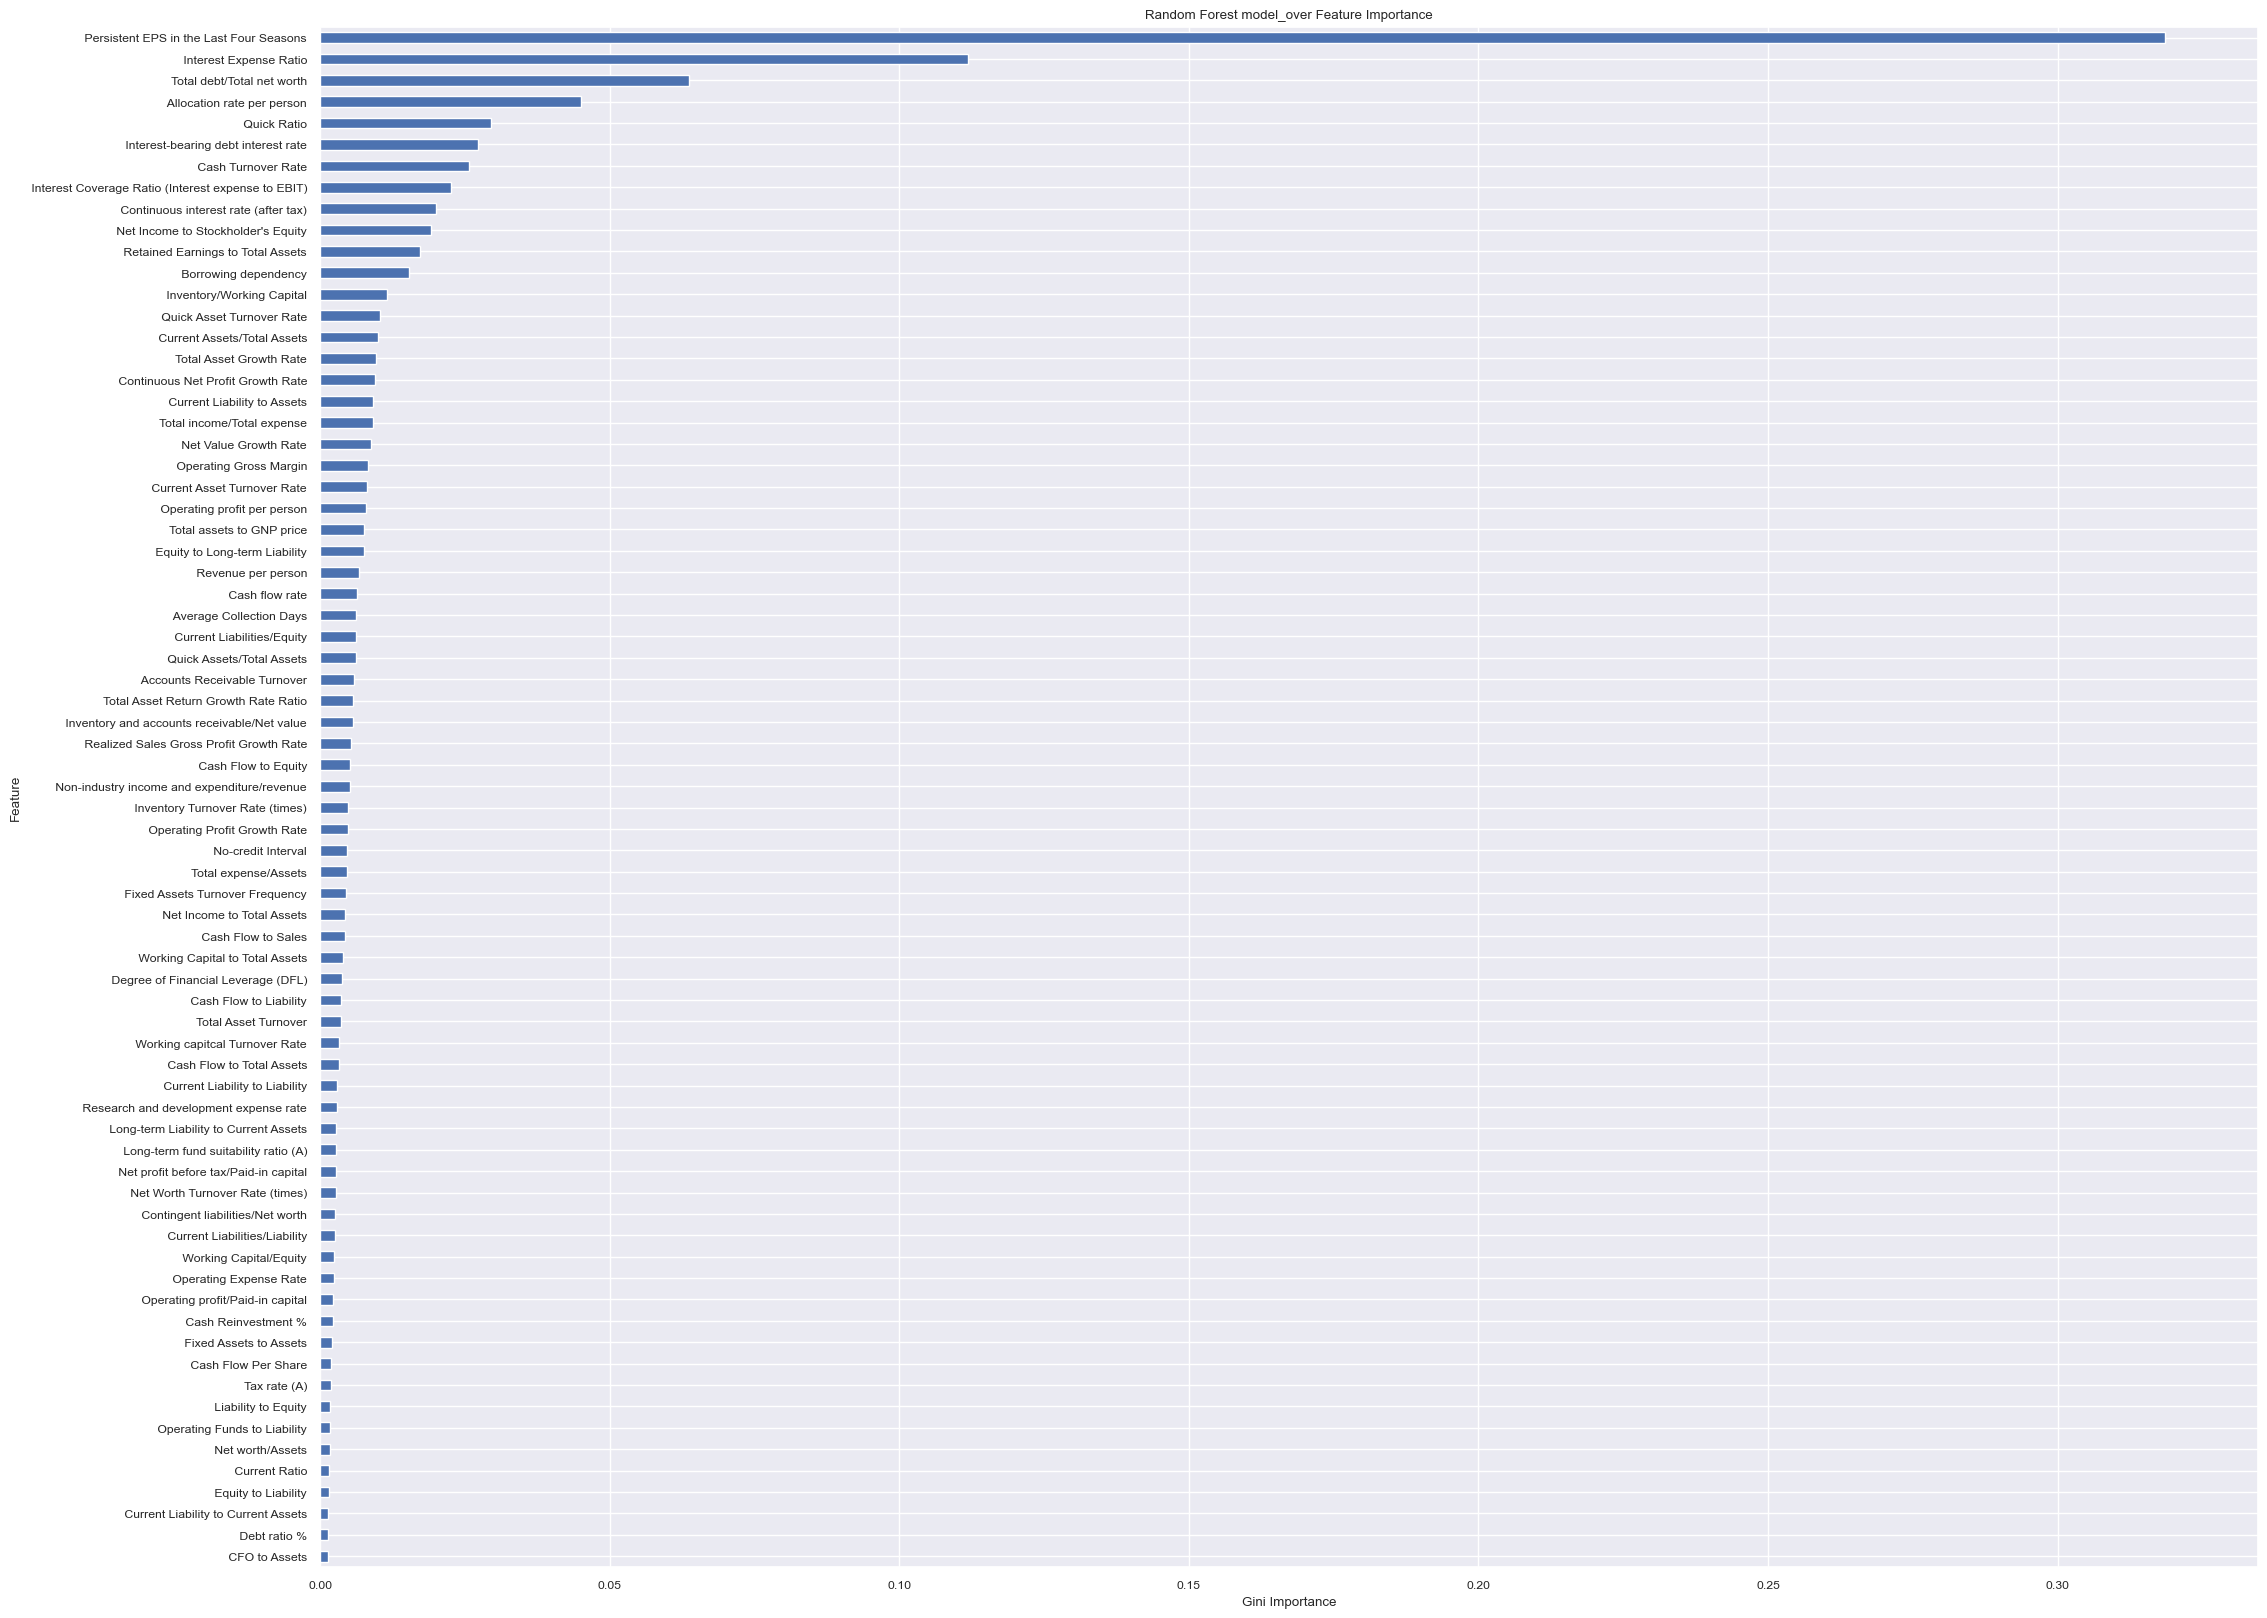

In [98]:
# sorted_idx = classifier_ros.feature_importances_.argsort()
# plt.barh(df.columns[sorted_idx], classifier_ros.feature_importances_[sorted_idx])
# plt.gcf().set_size_inches((25, 20))
# plt.xlabel("Random Forest Feature Importance")

importances = classifier_ros.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Random Forest Model Evaluation

In [99]:
# Model Accuracy
y_pred= classifier_ros.predict(x_test_ros) 
print(classifier_ros)
print(accuracy_score(y_test_ros, y_pred))

RandomForestClassifier(criterion='entropy', max_features=72)
0.6579347000759301


In [100]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1301,   16],
       [ 885,  432]], dtype=int64)

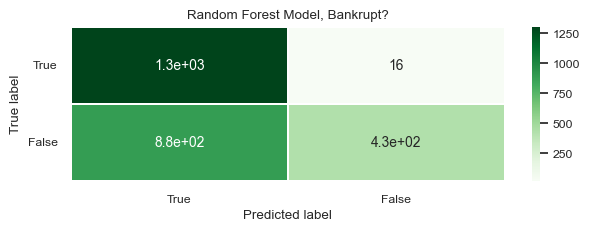

In [101]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [102]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.99      0.74      1317
           1       0.96      0.33      0.49      1317

    accuracy                           0.66      2634
   macro avg       0.78      0.66      0.62      2634
weighted avg       0.78      0.66      0.62      2634



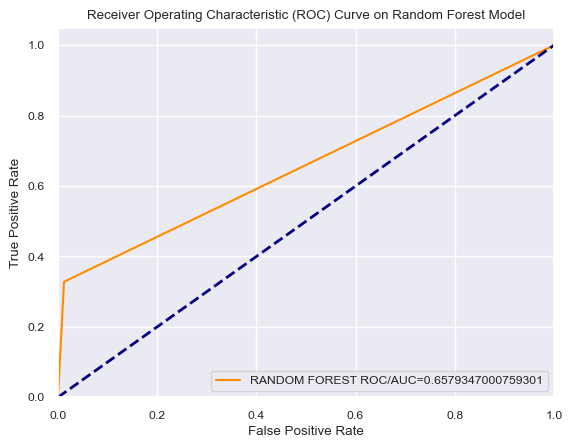

In [103]:
fpr_random_forest, tpr_random_forest, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_random_forest = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_random_forest,tpr_random_forest,label="RANDOM FOREST ROC/AUC="+str(auc_random_forest),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

In [247]:
classifier_reg = RandomForestRegressor(n_estimators = 100, max_features= x.shape[1], max_depth = None)
classifier_reg

RandomForestRegressor(max_features=72)

In [248]:
classifier_reg_ros= classifier_reg.fit(x_train_ros, y_train_ros) 
classifier_reg_ros

RandomForestRegressor(max_features=72)

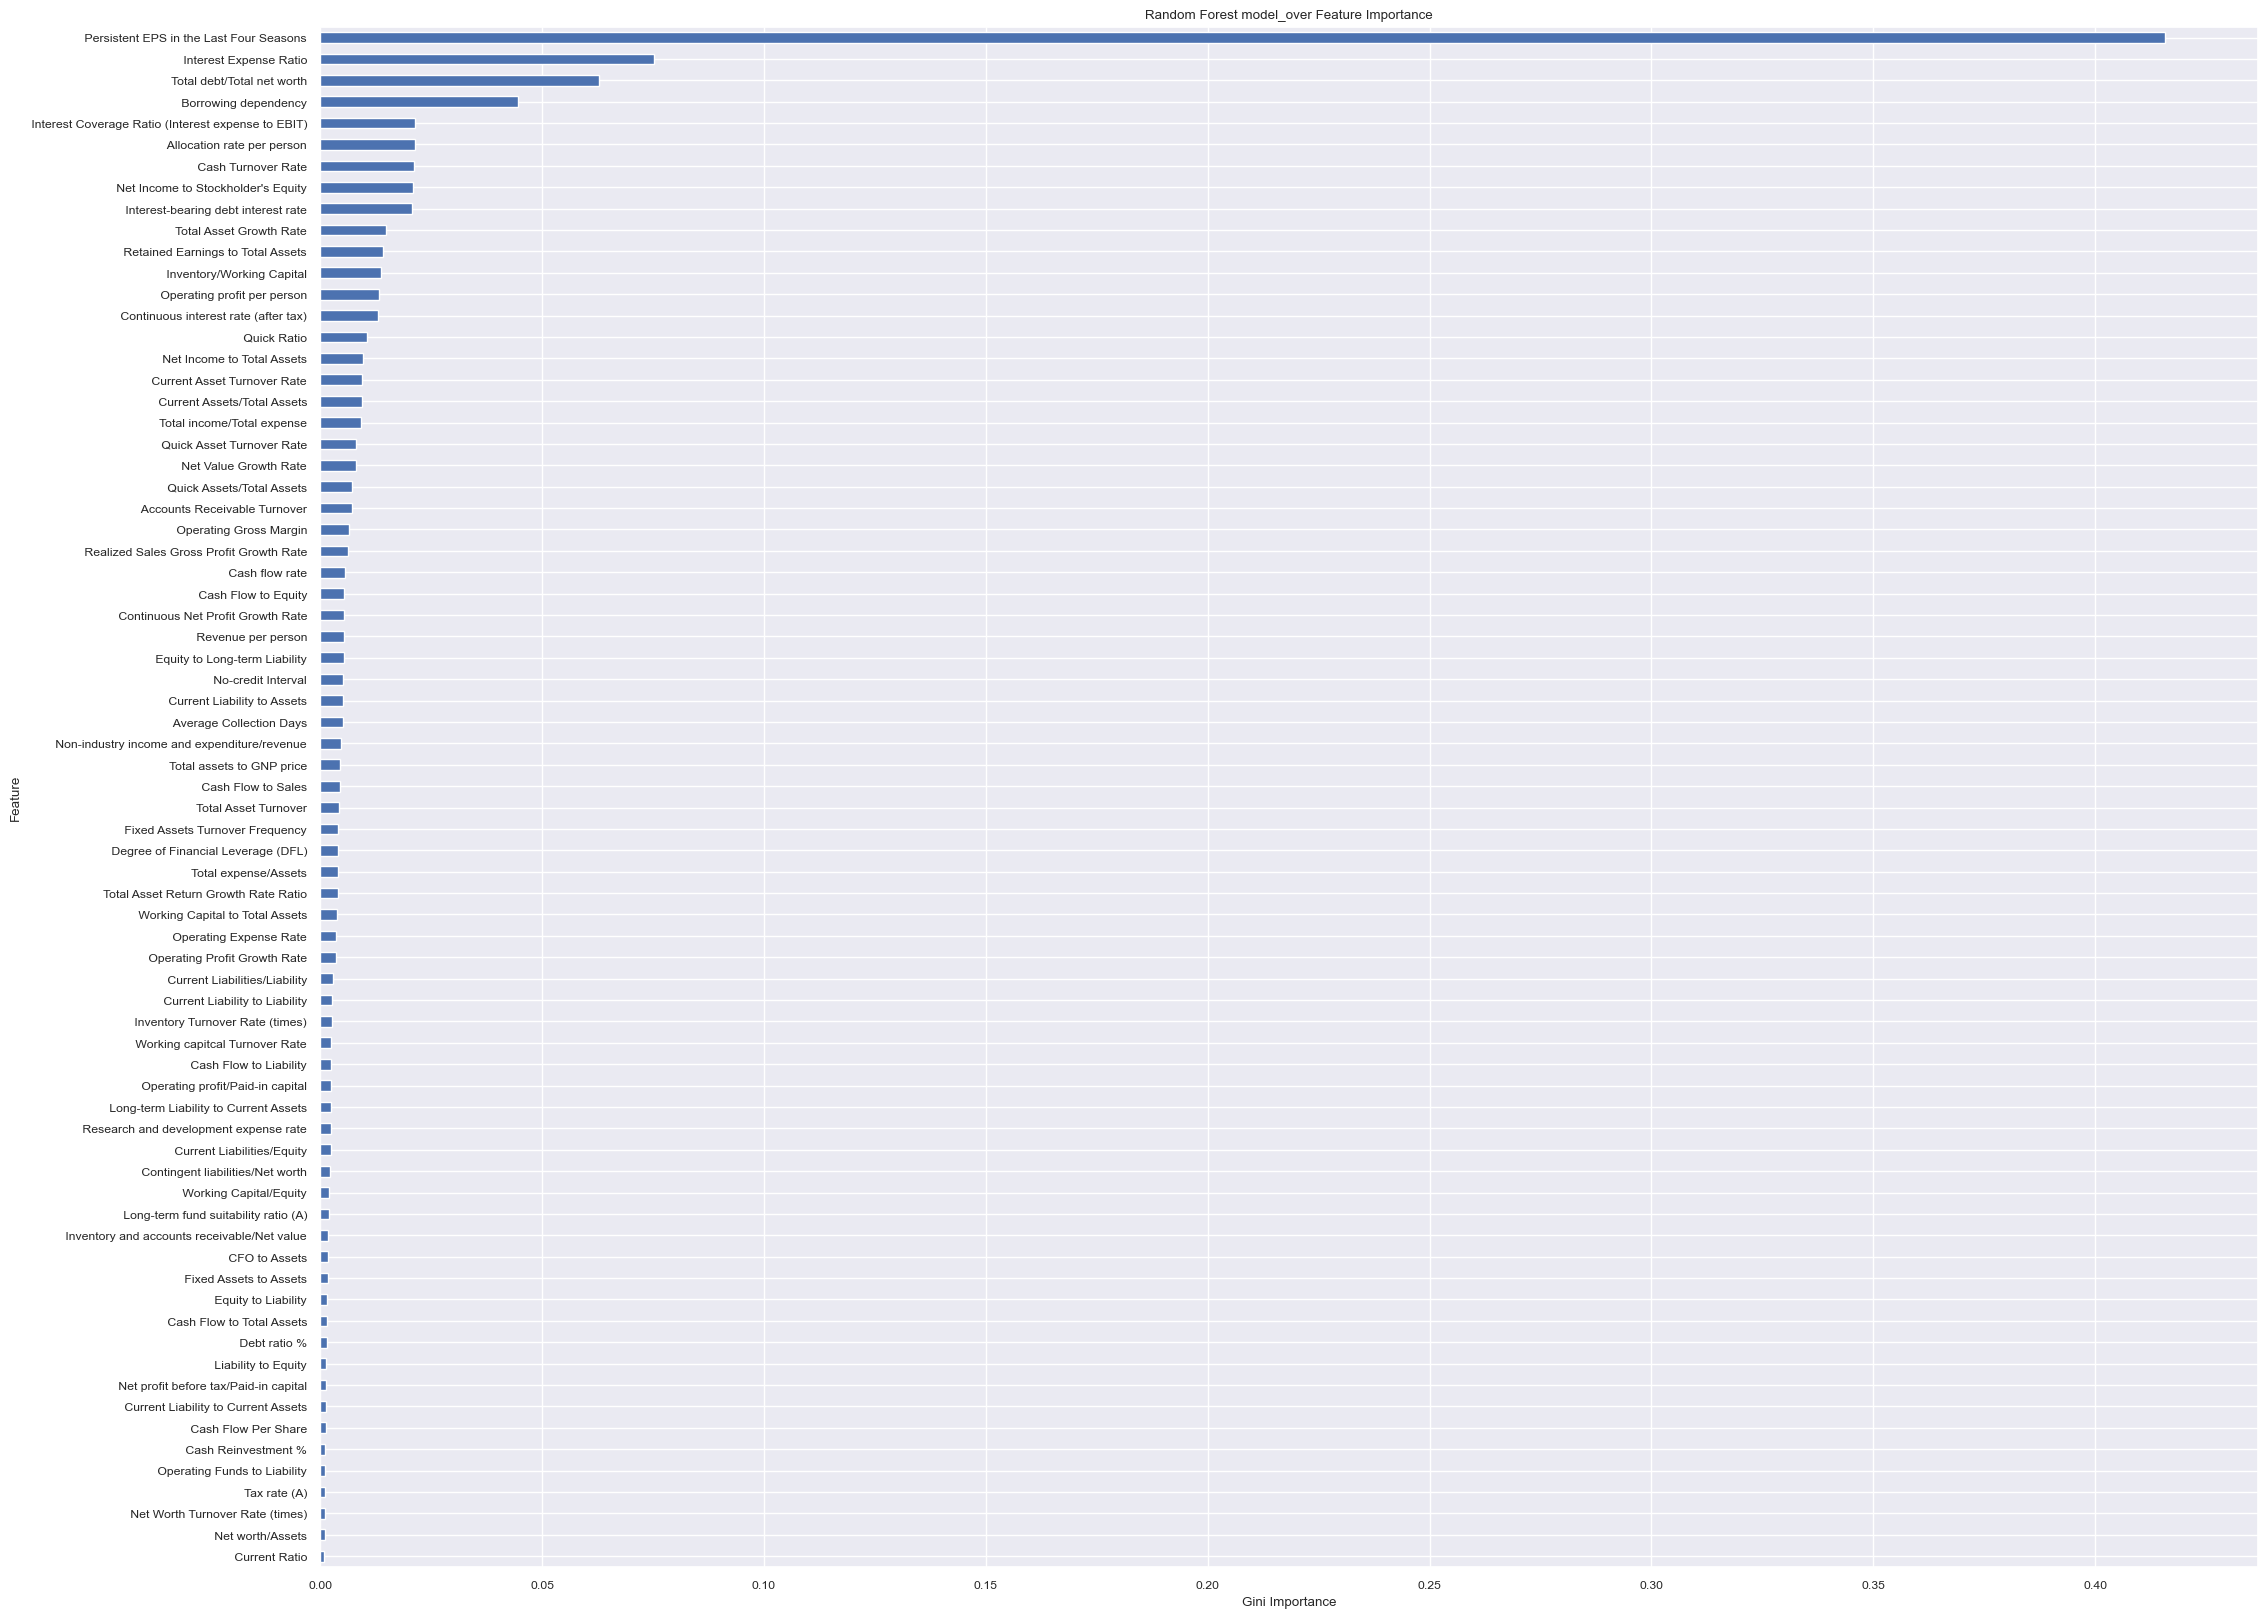

In [251]:
# sorted_idx = classifier_ros.feature_importances_.argsort()
# plt.barh(df.columns[sorted_idx], classifier_ros.feature_importances_[sorted_idx])
# plt.gcf().set_size_inches((25, 20))
# plt.xlabel("Random Forest Feature Importance")

importances = classifier_reg_ros.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Random Forest Regresion Evaluation

In [253]:
# Model Accuracy
y_pred= classifier_reg_ros.predict(x_test_ros) 
print('Regression Max Error: {0}'.format(mt.max_error(y_test_ros, y_pred)))
print('Mean Squared Error (MSE): {0}'.format(mt.mean_squared_error(y_test_ros, y_pred)))
print('Mean Absolute Error (MAE): {0}'.format(mt.mean_absolute_error(y_test_ros, y_pred)))

Regression Max Error: 1.0
Mean Squared Error (MSE): 0.2823242217160213
Mean Absolute Error (MAE): 0.34646165527714506


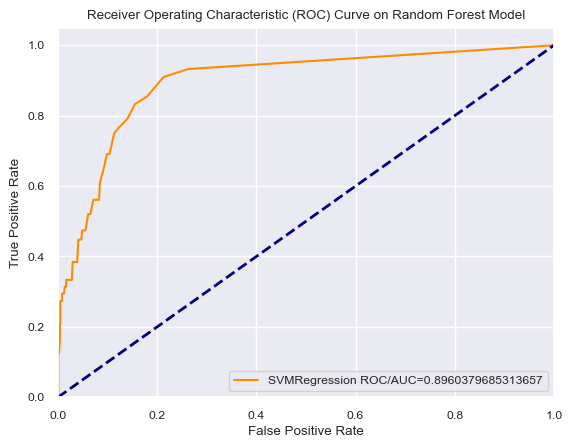

In [254]:
fpr_rf_reg_ros, tpr_rf_reg_ros, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_rf_reg_ros = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_rf_reg_ros,tpr_rf_reg_ros,label="SVMRegression ROC/AUC="+str(auc_rf_reg_ros),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### B(b). Decision Tree Algorithm

[Text(0.44935344827586204, 0.9924242424242424, 'X[8] <= 0.211\ngini = 0.5\nsamples = 10564\nvalue = [5282, 5282]'),
 Text(0.23275862068965517, 0.9772727272727273, 'X[20] <= 0.009\ngini = 0.294\nsamples = 5265\nvalue = [943, 4322]'),
 Text(0.15517241379310345, 0.9621212121212122, 'X[67] <= 0.837\ngini = 0.499\nsamples = 1241\nvalue = [598, 643]'),
 Text(0.10344827586206896, 0.946969696969697, 'X[51] <= 0.0\ngini = 0.332\nsamples = 576\nvalue = [121, 455]'),
 Text(0.08620689655172414, 0.9318181818181818, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.1206896551724138, 0.9318181818181818, 'X[55] <= 0.672\ngini = 0.284\nsamples = 549\nvalue = [94, 455]'),
 Text(0.10344827586206896, 0.9166666666666666, 'X[48] <= 0.911\ngini = 0.243\nsamples = 530\nvalue = [75, 455]'),
 Text(0.08620689655172414, 0.9015151515151515, 'X[57] <= 0.991\ngini = 0.206\nsamples = 515\nvalue = [60, 455]'),
 Text(0.06896551724137931, 0.8863636363636364, 'X[49] <= 0.002\ngini = 0.176\nsamples = 504\nvalue = [49,

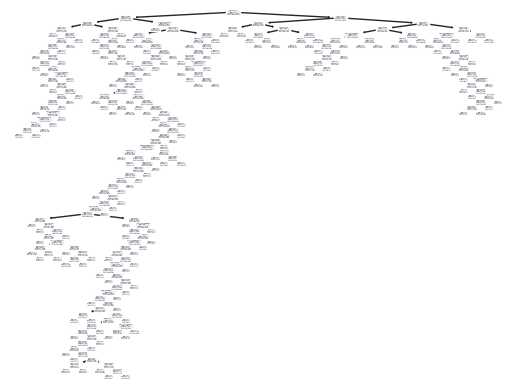

In [104]:
clf = tree.DecisionTreeClassifier()
clf_ros = clf.fit(x_train_ros, y_train_ros)
tree.plot_tree(clf_ros)

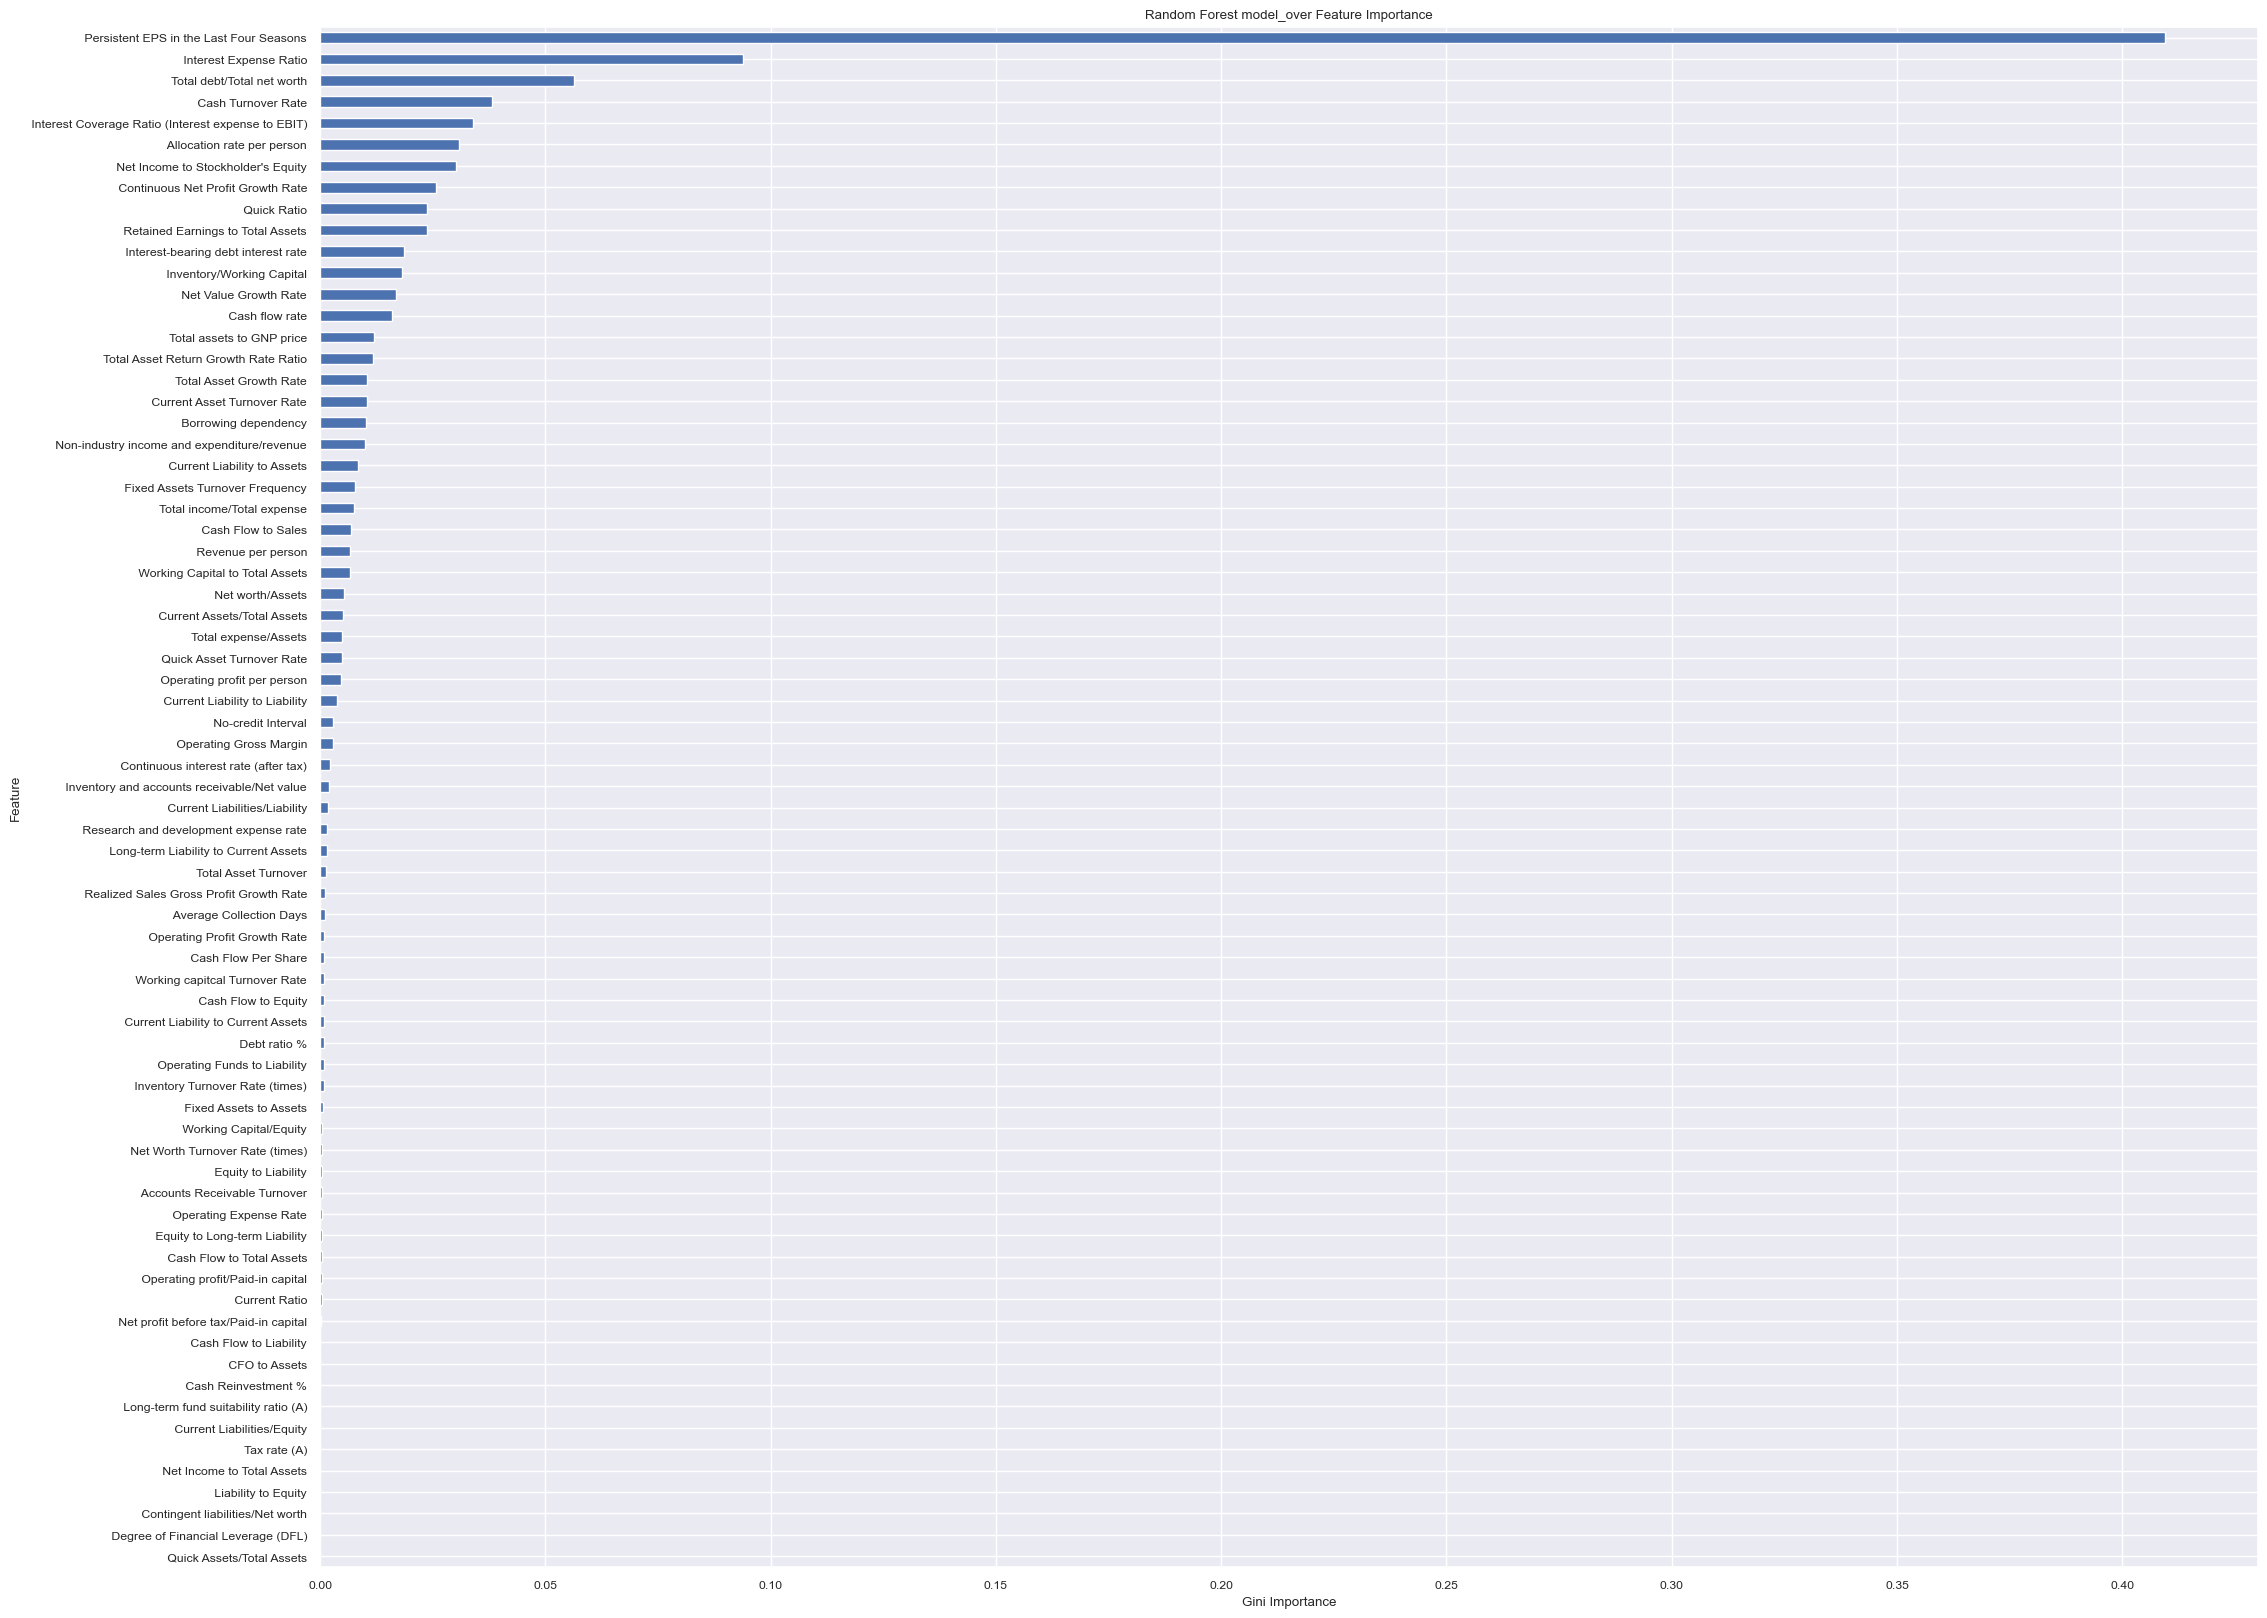

In [105]:
importances = clf_ros.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Decision Tree Model Evaluation

In [106]:
y_pred= clf_ros.predict(x_test_ros) 
print(clf_ros)
print(accuracy_score(y_test_ros, y_pred))

DecisionTreeClassifier()
0.6222475322703113


In [107]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1288,   29],
       [ 966,  351]], dtype=int64)

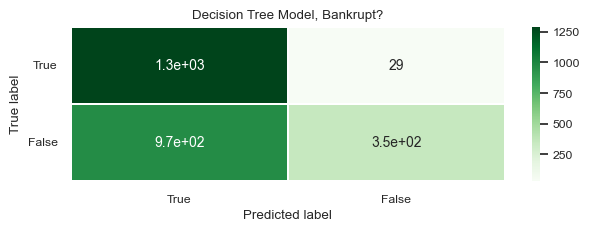

In [109]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Decision Tree Model, Bankrupt?')
plt.show()

In [110]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.98      0.72      1317
           1       0.92      0.27      0.41      1317

    accuracy                           0.62      2634
   macro avg       0.75      0.62      0.57      2634
weighted avg       0.75      0.62      0.57      2634



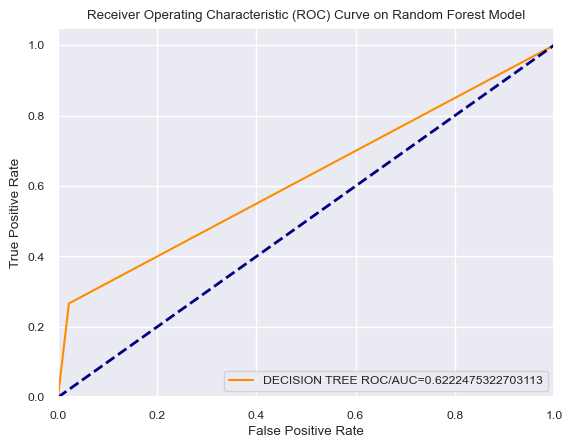

In [111]:
fpr_decision_tree, tpr_decision_tree, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_decision_tree = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_decision_tree,tpr_decision_tree,label="DECISION TREE ROC/AUC="+str(auc_decision_tree),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### B(c). Support Vectore Machine (SVM) Algorithm

#### Used Support Vectore Classifier

In [119]:
svmC = svm.SVC()
svm_ros = svmC.fit(x_train_ros, y_train_ros)

In [120]:
y_pred= svm_ros.predict(x_test_ros) 
print(svm_ros)
print(accuracy_score(y_test_ros, y_pred))

SVC()
0.639331814730448


### Support Vector Machine Classifier Model Evaluation

In [121]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[980, 337],
       [613, 704]], dtype=int64)

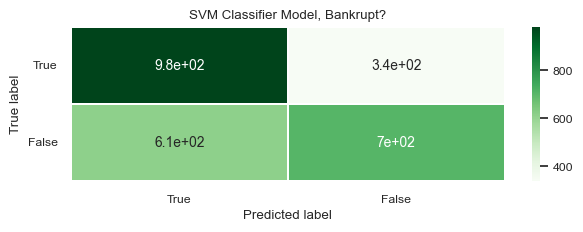

In [122]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SVM Classifier Model, Bankrupt?')
plt.show()

In [123]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_ros,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      1317
           1       0.68      0.53      0.60      1317

    accuracy                           0.64      2634
   macro avg       0.65      0.64      0.64      2634
weighted avg       0.65      0.64      0.64      2634



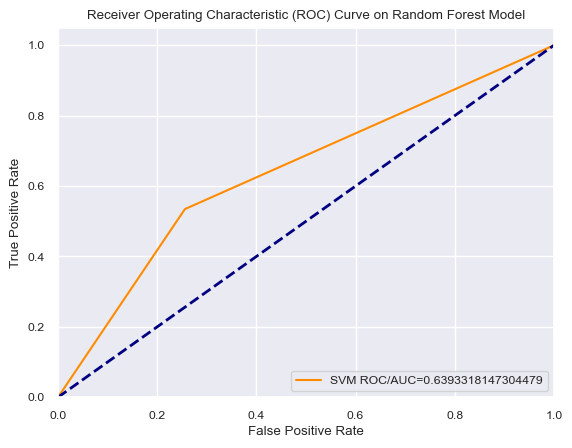

In [124]:
fpr_svmc, tpr_svmc, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_svmc = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_svmc,tpr_svmc,label="SVM ROC/AUC="+str(auc_svmc),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

#### Used Support Vector Regression

In [125]:
svmR = svm.SVR()
svm_ros = svmR.fit(x_train_ros, y_train_ros)

In [126]:
y_pred= svm_ros.predict(x_test_ros) 
print(svm_ros)
print('Regression Max Error: {0}'.format(mt.max_error(y_test_ros, y_pred)))
print('Mean Squared Error (MSE): {0}'.format(mt.mean_squared_error(y_test_ros, y_pred)))
print('Mean Absolute Error (MAE): {0}'.format(mt.mean_absolute_error(y_test_ros, y_pred)))

SVR()
Regression Max Error: 1.2085807600847143
Mean Squared Error (MSE): 0.26017734880176174
Mean Absolute Error (MAE): 0.40834847723833306


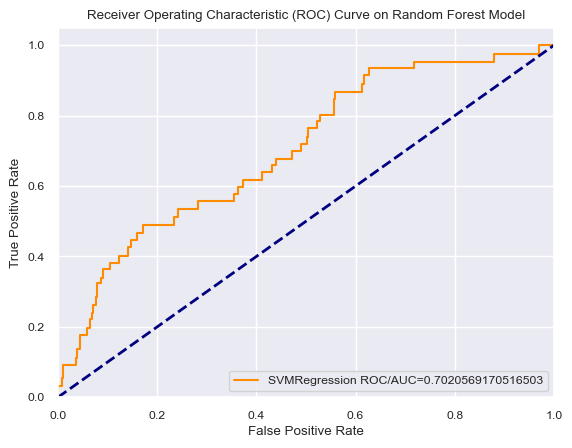

In [127]:
fpr_svmr, tpr_svmr, _ = mt.roc_curve(y_test_ros,  y_pred)
auc_svmr = mt.roc_auc_score(y_test_ros, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_svmr,tpr_svmr,label="SVMRegression ROC/AUC="+str(auc_svmr),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### B(d). Artificial Neural Network (ANN) Algorithm

In [228]:
# Initialize ANN 
ann = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
## 1. units:- number of neurons that will be present in the respective layer
## 2. activation:- specify which activation function to be used
ann.add(tf.keras.layers.Dense(units=x.shape[1],activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=x.shape[1],activation="relu"))

#Adding Output Layer
## Because This is a binary classification (output either 0 or 1) than I only need 1 neuron
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
## 1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent.
## 2. loss:- specifies which loss function should be used.
## 3. metrics:- which performance metrics to be used in order to compute performance.
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Fitting ANN to build a model from splitting datasetset
## 3.batch_size: how many observations should be there in the batch
## 4. epochs: How many times neural networks will be trained.
ann_ros = ann.fit(x_train_ros, y_train_ros,batch_size=3000,epochs = 1000, validation_data=(x_test_ros, y_test_ros))

Epoch 1/1000
4/4 [==============================] - 0s 44ms/step - loss: 195473424.0000 - accuracy: 0.4760 - val_loss: 145616016.0000 - val_accuracy: 0.4662
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 117451768.0000 - accuracy: 0.4883 - val_loss: 55448252.0000 - val_accuracy: 0.5273
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 58611840.0000 - accuracy: 0.5183 - val_loss: 53814624.0000 - val_accuracy: 0.5740
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 51760876.0000 - accuracy: 0.5470 - val_loss: 52180732.0000 - val_accuracy: 0.5596
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 45415764.0000 - accuracy: 0.5582 - val_loss: 47667200.0000 - val_accuracy: 0.5702
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 36668084.0000 - accuracy: 0.5735 - val_loss: 42957412.0000 - val_accuracy: 0.6169
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - 

Epoch 54/1000
4/4 [==============================] - 0s 10ms/step - loss: 1071012.6250 - accuracy: 0.8237 - val_loss: 19550964.0000 - val_accuracy: 0.5756
Epoch 55/1000
4/4 [==============================] - 0s 10ms/step - loss: 993067.1250 - accuracy: 0.8391 - val_loss: 21536770.0000 - val_accuracy: 0.5592
Epoch 56/1000
4/4 [==============================] - 0s 10ms/step - loss: 888992.1250 - accuracy: 0.8362 - val_loss: 21288998.0000 - val_accuracy: 0.5683
Epoch 57/1000
4/4 [==============================] - 0s 10ms/step - loss: 959458.5625 - accuracy: 0.8212 - val_loss: 18341124.0000 - val_accuracy: 0.5486
Epoch 58/1000
4/4 [==============================] - 0s 10ms/step - loss: 1102619.3750 - accuracy: 0.8283 - val_loss: 18682956.0000 - val_accuracy: 0.6048
Epoch 59/1000
4/4 [==============================] - 0s 13ms/step - loss: 1192842.8750 - accuracy: 0.8297 - val_loss: 21800268.0000 - val_accuracy: 0.5505
Epoch 60/1000
4/4 [==============================] - 0s 14ms/step - loss:

4/4 [==============================] - 0s 10ms/step - loss: 514260.7812 - accuracy: 0.8660 - val_loss: 20654930.0000 - val_accuracy: 0.5478
Epoch 108/1000
4/4 [==============================] - 0s 10ms/step - loss: 658805.1250 - accuracy: 0.8686 - val_loss: 23479330.0000 - val_accuracy: 0.5831
Epoch 109/1000
4/4 [==============================] - 0s 10ms/step - loss: 938351.5625 - accuracy: 0.8450 - val_loss: 19099592.0000 - val_accuracy: 0.5733
Epoch 110/1000
4/4 [==============================] - 0s 13ms/step - loss: 747078.9375 - accuracy: 0.8731 - val_loss: 22372272.0000 - val_accuracy: 0.5793
Epoch 111/1000
4/4 [==============================] - 0s 15ms/step - loss: 578536.5625 - accuracy: 0.8820 - val_loss: 19347106.0000 - val_accuracy: 0.5866
Epoch 112/1000
4/4 [==============================] - 0s 15ms/step - loss: 799918.0625 - accuracy: 0.8573 - val_loss: 18952924.0000 - val_accuracy: 0.5790
Epoch 113/1000
4/4 [==============================] - 0s 10ms/step - loss: 692397.250

Epoch 160/1000
4/4 [==============================] - 0s 14ms/step - loss: 987417.0000 - accuracy: 0.8631 - val_loss: 18048952.0000 - val_accuracy: 0.5661
Epoch 161/1000
4/4 [==============================] - 0s 13ms/step - loss: 1083449.0000 - accuracy: 0.8383 - val_loss: 20296042.0000 - val_accuracy: 0.5964
Epoch 162/1000
4/4 [==============================] - 0s 11ms/step - loss: 672305.4375 - accuracy: 0.8715 - val_loss: 20840502.0000 - val_accuracy: 0.5756
Epoch 163/1000
4/4 [==============================] - 0s 10ms/step - loss: 552211.8750 - accuracy: 0.8867 - val_loss: 24493988.0000 - val_accuracy: 0.5748
Epoch 164/1000
4/4 [==============================] - 0s 9ms/step - loss: 622080.9375 - accuracy: 0.8841 - val_loss: 22919700.0000 - val_accuracy: 0.5520
Epoch 165/1000
4/4 [==============================] - 0s 10ms/step - loss: 644203.3125 - accuracy: 0.8590 - val_loss: 20667358.0000 - val_accuracy: 0.5896
Epoch 166/1000
4/4 [==============================] - 0s 12ms/step - l

Epoch 213/1000
4/4 [==============================] - 0s 12ms/step - loss: 544776.0625 - accuracy: 0.8914 - val_loss: 20031074.0000 - val_accuracy: 0.6017
Epoch 214/1000
4/4 [==============================] - 0s 10ms/step - loss: 603547.5000 - accuracy: 0.8787 - val_loss: 22671800.0000 - val_accuracy: 0.5801
Epoch 215/1000
4/4 [==============================] - 0s 9ms/step - loss: 584150.0625 - accuracy: 0.8828 - val_loss: 20502624.0000 - val_accuracy: 0.5812
Epoch 216/1000
4/4 [==============================] - 0s 9ms/step - loss: 566765.1250 - accuracy: 0.8816 - val_loss: 18051332.0000 - val_accuracy: 0.6169
Epoch 217/1000
4/4 [==============================] - 0s 10ms/step - loss: 604083.9375 - accuracy: 0.8804 - val_loss: 21560294.0000 - val_accuracy: 0.5345
Epoch 218/1000
4/4 [==============================] - 0s 10ms/step - loss: 580449.9375 - accuracy: 0.8813 - val_loss: 19915880.0000 - val_accuracy: 0.6116
Epoch 219/1000
4/4 [==============================] - 0s 12ms/step - los

Epoch 266/1000
4/4 [==============================] - 0s 16ms/step - loss: 360564.4062 - accuracy: 0.8994 - val_loss: 20629020.0000 - val_accuracy: 0.6154
Epoch 267/1000
4/4 [==============================] - 0s 14ms/step - loss: 303027.5938 - accuracy: 0.9231 - val_loss: 22855888.0000 - val_accuracy: 0.5482
Epoch 268/1000
4/4 [==============================] - 0s 15ms/step - loss: 292178.5938 - accuracy: 0.9166 - val_loss: 20468692.0000 - val_accuracy: 0.5577
Epoch 269/1000
4/4 [==============================] - 0s 13ms/step - loss: 279983.9375 - accuracy: 0.9109 - val_loss: 24037114.0000 - val_accuracy: 0.5687
Epoch 270/1000
4/4 [==============================] - 0s 12ms/step - loss: 346343.5312 - accuracy: 0.9022 - val_loss: 23548264.0000 - val_accuracy: 0.5710
Epoch 271/1000
4/4 [==============================] - 0s 12ms/step - loss: 393433.7812 - accuracy: 0.8998 - val_loss: 25036792.0000 - val_accuracy: 0.5687
Epoch 272/1000
4/4 [==============================] - 0s 10ms/step - l

Epoch 319/1000
4/4 [==============================] - 0s 11ms/step - loss: 576751.6250 - accuracy: 0.8715 - val_loss: 16432939.0000 - val_accuracy: 0.5710
Epoch 320/1000
4/4 [==============================] - 0s 13ms/step - loss: 923966.0625 - accuracy: 0.8498 - val_loss: 17757146.0000 - val_accuracy: 0.5737
Epoch 321/1000
4/4 [==============================] - 0s 13ms/step - loss: 1103097.1250 - accuracy: 0.8621 - val_loss: 18608180.0000 - val_accuracy: 0.6090
Epoch 322/1000
4/4 [==============================] - 0s 11ms/step - loss: 608581.0000 - accuracy: 0.8949 - val_loss: 21767948.0000 - val_accuracy: 0.5680
Epoch 323/1000
4/4 [==============================] - 0s 10ms/step - loss: 498274.4688 - accuracy: 0.8913 - val_loss: 18987228.0000 - val_accuracy: 0.6086
Epoch 324/1000
4/4 [==============================] - 0s 9ms/step - loss: 464094.9375 - accuracy: 0.9016 - val_loss: 21757032.0000 - val_accuracy: 0.5600
Epoch 325/1000
4/4 [==============================] - 0s 10ms/step - l

Epoch 372/1000
4/4 [==============================] - 0s 10ms/step - loss: 179577.5312 - accuracy: 0.9297 - val_loss: 23249050.0000 - val_accuracy: 0.5744
Epoch 373/1000
4/4 [==============================] - 0s 12ms/step - loss: 193455.8438 - accuracy: 0.9202 - val_loss: 22113872.0000 - val_accuracy: 0.5418
Epoch 374/1000
4/4 [==============================] - 0s 12ms/step - loss: 230847.8125 - accuracy: 0.9235 - val_loss: 22239624.0000 - val_accuracy: 0.5763
Epoch 375/1000
4/4 [==============================] - 0s 10ms/step - loss: 421115.7812 - accuracy: 0.8991 - val_loss: 20945618.0000 - val_accuracy: 0.5900
Epoch 376/1000
4/4 [==============================] - 0s 9ms/step - loss: 493993.7812 - accuracy: 0.8872 - val_loss: 23939074.0000 - val_accuracy: 0.5725
Epoch 377/1000
4/4 [==============================] - 0s 10ms/step - loss: 569377.8750 - accuracy: 0.8727 - val_loss: 18431802.0000 - val_accuracy: 0.5843
Epoch 378/1000
4/4 [==============================] - 0s 9ms/step - los

Epoch 425/1000
4/4 [==============================] - 0s 10ms/step - loss: 384515.0000 - accuracy: 0.9122 - val_loss: 22864702.0000 - val_accuracy: 0.5949
Epoch 426/1000
4/4 [==============================] - 0s 10ms/step - loss: 289274.5625 - accuracy: 0.9229 - val_loss: 22748182.0000 - val_accuracy: 0.6052
Epoch 427/1000
4/4 [==============================] - 0s 10ms/step - loss: 356444.1250 - accuracy: 0.8990 - val_loss: 20735222.0000 - val_accuracy: 0.5835
Epoch 428/1000
4/4 [==============================] - 0s 10ms/step - loss: 376280.1562 - accuracy: 0.8987 - val_loss: 19456170.0000 - val_accuracy: 0.5380
Epoch 429/1000
4/4 [==============================] - 0s 10ms/step - loss: 561778.6875 - accuracy: 0.8795 - val_loss: 18573120.0000 - val_accuracy: 0.5991
Epoch 430/1000
4/4 [==============================] - 0s 9ms/step - loss: 683123.9375 - accuracy: 0.8819 - val_loss: 20281922.0000 - val_accuracy: 0.5672
Epoch 431/1000
4/4 [==============================] - 0s 10ms/step - lo

Epoch 478/1000
4/4 [==============================] - 0s 10ms/step - loss: 225013.4844 - accuracy: 0.9198 - val_loss: 21791540.0000 - val_accuracy: 0.5604
Epoch 479/1000
4/4 [==============================] - 0s 9ms/step - loss: 209750.2031 - accuracy: 0.9211 - val_loss: 24223196.0000 - val_accuracy: 0.5630
Epoch 480/1000
4/4 [==============================] - 0s 9ms/step - loss: 197429.0156 - accuracy: 0.9130 - val_loss: 22999472.0000 - val_accuracy: 0.5866
Epoch 481/1000
4/4 [==============================] - 0s 10ms/step - loss: 163697.6719 - accuracy: 0.9302 - val_loss: 26598556.0000 - val_accuracy: 0.5520
Epoch 482/1000
4/4 [==============================] - 0s 10ms/step - loss: 491252.8125 - accuracy: 0.8792 - val_loss: 19459330.0000 - val_accuracy: 0.6139
Epoch 483/1000
4/4 [==============================] - 0s 10ms/step - loss: 514410.8125 - accuracy: 0.9033 - val_loss: 21347320.0000 - val_accuracy: 0.5509
Epoch 484/1000
4/4 [==============================] - 0s 10ms/step - los

Epoch 531/1000
4/4 [==============================] - 0s 11ms/step - loss: 613996.9375 - accuracy: 0.8845 - val_loss: 23210064.0000 - val_accuracy: 0.5786
Epoch 532/1000
4/4 [==============================] - 0s 10ms/step - loss: 765104.3750 - accuracy: 0.8604 - val_loss: 20999106.0000 - val_accuracy: 0.5953
Epoch 533/1000
4/4 [==============================] - 0s 10ms/step - loss: 407163.9688 - accuracy: 0.9265 - val_loss: 24180968.0000 - val_accuracy: 0.5930
Epoch 534/1000
4/4 [==============================] - 0s 9ms/step - loss: 465624.0625 - accuracy: 0.8956 - val_loss: 25055306.0000 - val_accuracy: 0.5831
Epoch 535/1000
4/4 [==============================] - 0s 10ms/step - loss: 314218.7500 - accuracy: 0.9113 - val_loss: 20586632.0000 - val_accuracy: 0.5805
Epoch 536/1000
4/4 [==============================] - 0s 10ms/step - loss: 435357.6250 - accuracy: 0.9164 - val_loss: 22429562.0000 - val_accuracy: 0.6055
Epoch 537/1000
4/4 [==============================] - 0s 9ms/step - los

Epoch 584/1000
4/4 [==============================] - 0s 13ms/step - loss: 306276.5312 - accuracy: 0.9025 - val_loss: 21834146.0000 - val_accuracy: 0.5604
Epoch 585/1000
4/4 [==============================] - 0s 15ms/step - loss: 275033.9062 - accuracy: 0.9198 - val_loss: 23295828.0000 - val_accuracy: 0.5706
Epoch 586/1000
4/4 [==============================] - 0s 14ms/step - loss: 183925.9219 - accuracy: 0.9254 - val_loss: 24018880.0000 - val_accuracy: 0.5672
Epoch 587/1000
4/4 [==============================] - 0s 14ms/step - loss: 178943.8594 - accuracy: 0.9223 - val_loss: 24101488.0000 - val_accuracy: 0.5588
Epoch 588/1000
4/4 [==============================] - 0s 12ms/step - loss: 349323.4375 - accuracy: 0.8944 - val_loss: 25374304.0000 - val_accuracy: 0.5520
Epoch 589/1000
4/4 [==============================] - 0s 10ms/step - loss: 617340.4375 - accuracy: 0.8868 - val_loss: 26548116.0000 - val_accuracy: 0.5626
Epoch 590/1000
4/4 [==============================] - 0s 12ms/step - l

Epoch 637/1000
4/4 [==============================] - 0s 9ms/step - loss: 261894.4688 - accuracy: 0.9087 - val_loss: 22610128.0000 - val_accuracy: 0.5934
Epoch 638/1000
4/4 [==============================] - 0s 10ms/step - loss: 288891.4062 - accuracy: 0.9160 - val_loss: 21209496.0000 - val_accuracy: 0.5756
Epoch 639/1000
4/4 [==============================] - 0s 12ms/step - loss: 275198.4688 - accuracy: 0.9094 - val_loss: 23219080.0000 - val_accuracy: 0.5759
Epoch 640/1000
4/4 [==============================] - 0s 14ms/step - loss: 243721.1406 - accuracy: 0.9247 - val_loss: 23027348.0000 - val_accuracy: 0.5490
Epoch 641/1000
4/4 [==============================] - 0s 15ms/step - loss: 225222.7812 - accuracy: 0.9207 - val_loss: 25225442.0000 - val_accuracy: 0.5471
Epoch 642/1000
4/4 [==============================] - 0s 13ms/step - loss: 414165.5312 - accuracy: 0.8888 - val_loss: 24241268.0000 - val_accuracy: 0.5649
Epoch 643/1000
4/4 [==============================] - 0s 12ms/step - lo

Epoch 690/1000
4/4 [==============================] - 0s 11ms/step - loss: 267741.7188 - accuracy: 0.9196 - val_loss: 25245286.0000 - val_accuracy: 0.5668
Epoch 691/1000
4/4 [==============================] - 0s 10ms/step - loss: 192202.3438 - accuracy: 0.9419 - val_loss: 24856216.0000 - val_accuracy: 0.5847
Epoch 692/1000
4/4 [==============================] - 0s 9ms/step - loss: 220530.5938 - accuracy: 0.9190 - val_loss: 23802984.0000 - val_accuracy: 0.5854
Epoch 693/1000
4/4 [==============================] - 0s 10ms/step - loss: 282073.5312 - accuracy: 0.9184 - val_loss: 29149366.0000 - val_accuracy: 0.5532
Epoch 694/1000
4/4 [==============================] - 0s 10ms/step - loss: 867049.8125 - accuracy: 0.8599 - val_loss: 23660304.0000 - val_accuracy: 0.5790
Epoch 695/1000
4/4 [==============================] - 0s 10ms/step - loss: 618328.7500 - accuracy: 0.8770 - val_loss: 23432126.0000 - val_accuracy: 0.6162
Epoch 696/1000
4/4 [==============================] - 0s 9ms/step - los

Epoch 743/1000
4/4 [==============================] - 0s 10ms/step - loss: 311496.5625 - accuracy: 0.9075 - val_loss: 23431538.0000 - val_accuracy: 0.5718
Epoch 744/1000
4/4 [==============================] - 0s 10ms/step - loss: 420490.6250 - accuracy: 0.8983 - val_loss: 27791524.0000 - val_accuracy: 0.5547
Epoch 745/1000
4/4 [==============================] - 0s 10ms/step - loss: 304395.0625 - accuracy: 0.9179 - val_loss: 24131574.0000 - val_accuracy: 0.5676
Epoch 746/1000
4/4 [==============================] - 0s 10ms/step - loss: 368943.7812 - accuracy: 0.9120 - val_loss: 24953614.0000 - val_accuracy: 0.5790
Epoch 747/1000
4/4 [==============================] - 0s 10ms/step - loss: 368074.8438 - accuracy: 0.8950 - val_loss: 20821784.0000 - val_accuracy: 0.5782
Epoch 748/1000
4/4 [==============================] - 0s 10ms/step - loss: 518045.1250 - accuracy: 0.9087 - val_loss: 24000078.0000 - val_accuracy: 0.5733
Epoch 749/1000
4/4 [==============================] - 0s 11ms/step - l

Epoch 796/1000
4/4 [==============================] - 0s 12ms/step - loss: 187776.5625 - accuracy: 0.9239 - val_loss: 26606432.0000 - val_accuracy: 0.5687
Epoch 797/1000
4/4 [==============================] - 0s 11ms/step - loss: 174116.1562 - accuracy: 0.9274 - val_loss: 22022344.0000 - val_accuracy: 0.5661
Epoch 798/1000
4/4 [==============================] - 0s 10ms/step - loss: 256820.8594 - accuracy: 0.9212 - val_loss: 26074218.0000 - val_accuracy: 0.5581
Epoch 799/1000
4/4 [==============================] - 0s 10ms/step - loss: 271232.0938 - accuracy: 0.9131 - val_loss: 21567736.0000 - val_accuracy: 0.5737
Epoch 800/1000
4/4 [==============================] - 0s 10ms/step - loss: 297724.5938 - accuracy: 0.9151 - val_loss: 24516122.0000 - val_accuracy: 0.5938
Epoch 801/1000
4/4 [==============================] - 0s 10ms/step - loss: 240250.7656 - accuracy: 0.9210 - val_loss: 26467992.0000 - val_accuracy: 0.5759
Epoch 802/1000
4/4 [==============================] - 0s 10ms/step - l

Epoch 849/1000
4/4 [==============================] - 0s 10ms/step - loss: 1533452.2500 - accuracy: 0.8514 - val_loss: 23167946.0000 - val_accuracy: 0.5831
Epoch 850/1000
4/4 [==============================] - 0s 10ms/step - loss: 1122066.1250 - accuracy: 0.8694 - val_loss: 28670202.0000 - val_accuracy: 0.5668
Epoch 851/1000
4/4 [==============================] - 0s 10ms/step - loss: 884350.1250 - accuracy: 0.8929 - val_loss: 20942496.0000 - val_accuracy: 0.5964
Epoch 852/1000
4/4 [==============================] - 0s 10ms/step - loss: 741199.3125 - accuracy: 0.9018 - val_loss: 25809608.0000 - val_accuracy: 0.5505
Epoch 853/1000
4/4 [==============================] - 0s 9ms/step - loss: 815539.5000 - accuracy: 0.8715 - val_loss: 21093286.0000 - val_accuracy: 0.5979
Epoch 854/1000
4/4 [==============================] - 0s 10ms/step - loss: 903181.1875 - accuracy: 0.8688 - val_loss: 27966570.0000 - val_accuracy: 0.5475
Epoch 855/1000
4/4 [==============================] - 0s 11ms/step - 

Epoch 902/1000
4/4 [==============================] - 0s 13ms/step - loss: 179207.3125 - accuracy: 0.9332 - val_loss: 24047700.0000 - val_accuracy: 0.5930
Epoch 903/1000
4/4 [==============================] - 0s 10ms/step - loss: 186776.6719 - accuracy: 0.9237 - val_loss: 24761120.0000 - val_accuracy: 0.5668
Epoch 904/1000
4/4 [==============================] - 0s 10ms/step - loss: 142846.7812 - accuracy: 0.9326 - val_loss: 31561480.0000 - val_accuracy: 0.5550
Epoch 905/1000
4/4 [==============================] - 0s 10ms/step - loss: 230911.5625 - accuracy: 0.9131 - val_loss: 26487660.0000 - val_accuracy: 0.5630
Epoch 906/1000
4/4 [==============================] - 0s 10ms/step - loss: 200360.3750 - accuracy: 0.9255 - val_loss: 27072806.0000 - val_accuracy: 0.5645
Epoch 907/1000
4/4 [==============================] - 0s 10ms/step - loss: 153010.3125 - accuracy: 0.9374 - val_loss: 25887666.0000 - val_accuracy: 0.5638
Epoch 908/1000
4/4 [==============================] - 0s 10ms/step - l

Epoch 955/1000
4/4 [==============================] - 0s 12ms/step - loss: 330041.9062 - accuracy: 0.9103 - val_loss: 27348386.0000 - val_accuracy: 0.5524
Epoch 956/1000
4/4 [==============================] - 0s 11ms/step - loss: 391732.0000 - accuracy: 0.9189 - val_loss: 24090162.0000 - val_accuracy: 0.5945
Epoch 957/1000
4/4 [==============================] - 0s 10ms/step - loss: 291937.9062 - accuracy: 0.9207 - val_loss: 28211646.0000 - val_accuracy: 0.5995
Epoch 958/1000
4/4 [==============================] - 0s 9ms/step - loss: 200603.6562 - accuracy: 0.9288 - val_loss: 28119650.0000 - val_accuracy: 0.5831
Epoch 959/1000
4/4 [==============================] - 0s 10ms/step - loss: 227120.2969 - accuracy: 0.9205 - val_loss: 26913112.0000 - val_accuracy: 0.5805
Epoch 960/1000
4/4 [==============================] - 0s 10ms/step - loss: 251484.8125 - accuracy: 0.9178 - val_loss: 28355118.0000 - val_accuracy: 0.5532
Epoch 961/1000
4/4 [==============================] - 0s 11ms/step - lo

In [229]:
# evaluate the model
scores = ann.evaluate(x_test_ros, y_test_ros)

print('\nTrain loss:', ann_ros.history['loss'][-1])
print("Train %s: %.2f%%" % (ann.metrics_names[1], ann_ros.history['accuracy'][-1]*100))

print('\nTest loss:', scores[0])
print("Test %s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

83/83 [==============================] - 0s 760us/step - loss: 25037512.0000 - accuracy: 0.5596

Train loss: 195778.078125
Train accuracy: 92.67%

Test loss: 25037512.0
Test accuracy: 55.96%


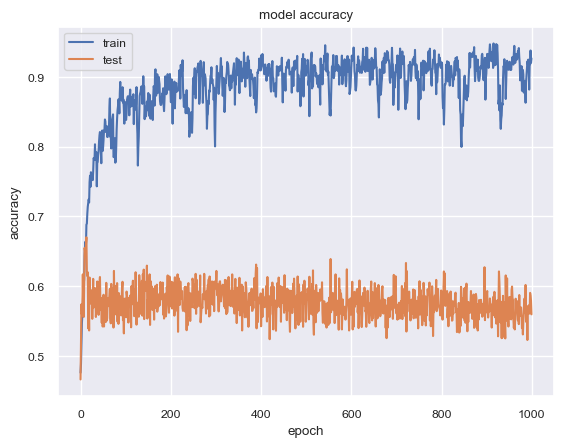

In [230]:
# summarize history for accuracy
plt.plot(ann_ros.history['accuracy'])
plt.plot(ann_ros.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

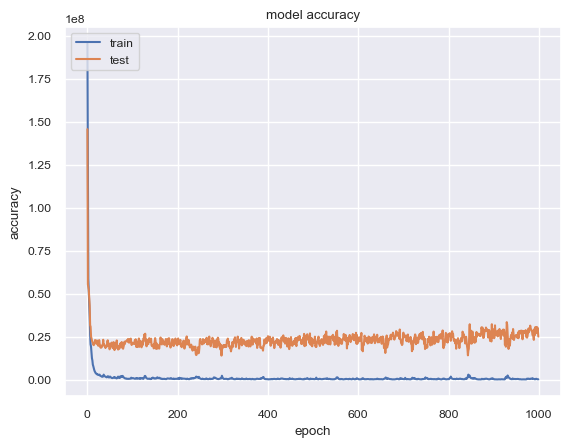

In [231]:
# summarize history for accuracy
plt.plot(ann_ros.history['loss'])
plt.plot(ann_ros.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Perbandingan ROC/AUC Dari algoritma yang dipilih 
## Dengan metode oversampling Random Over Sampler

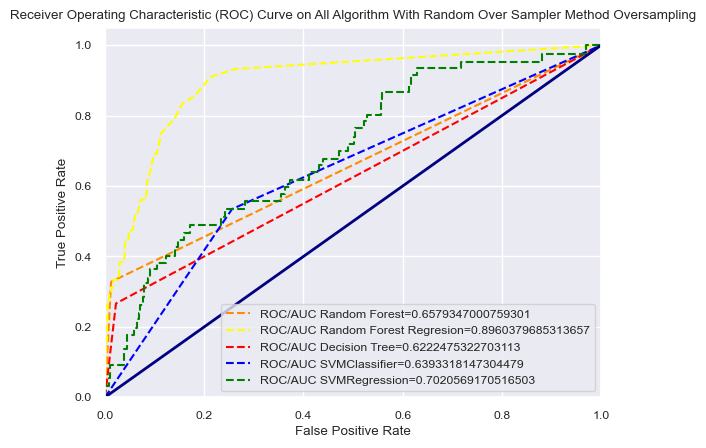

In [257]:
lw = 2

#create ROC curve
plt.plot(fpr_random_forest,tpr_random_forest,label="ROC/AUC Random Forest="+str(auc_random_forest),color="darkorange",linestyle='--')
plt.plot(fpr_rf_reg_ros,tpr_rf_reg_ros,label="ROC/AUC Random Forest Regresion="+str(auc_rf_reg_ros),color="yellow",linestyle='--')
plt.plot(fpr_decision_tree,tpr_decision_tree,label="ROC/AUC Decision Tree="+str(auc_decision_tree),color="red",linestyle='--')
plt.plot(fpr_svmc,tpr_svmc,label="ROC/AUC SVMClassifier="+str(auc_svmc),color="Blue",linestyle='--')
plt.plot(fpr_svmr,tpr_svmr,label="ROC/AUC SVMRegression="+str(auc_svmr),color="Green",linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on All Algorithm With Random Over Sampler Method Oversampling")
plt.show()

### C. With OVERSAMPLING method SMOTE

### C(a). Random Forest Algorithm

In [167]:
classifier= RandomForestClassifier(n_estimators = 80, criterion="entropy", max_features= 72, max_depth = None)  
classifier_sm= classifier.fit(x_train_sm, y_train_sm) 
classifier_sm

RandomForestClassifier(criterion='entropy', max_features=72, n_estimators=80)

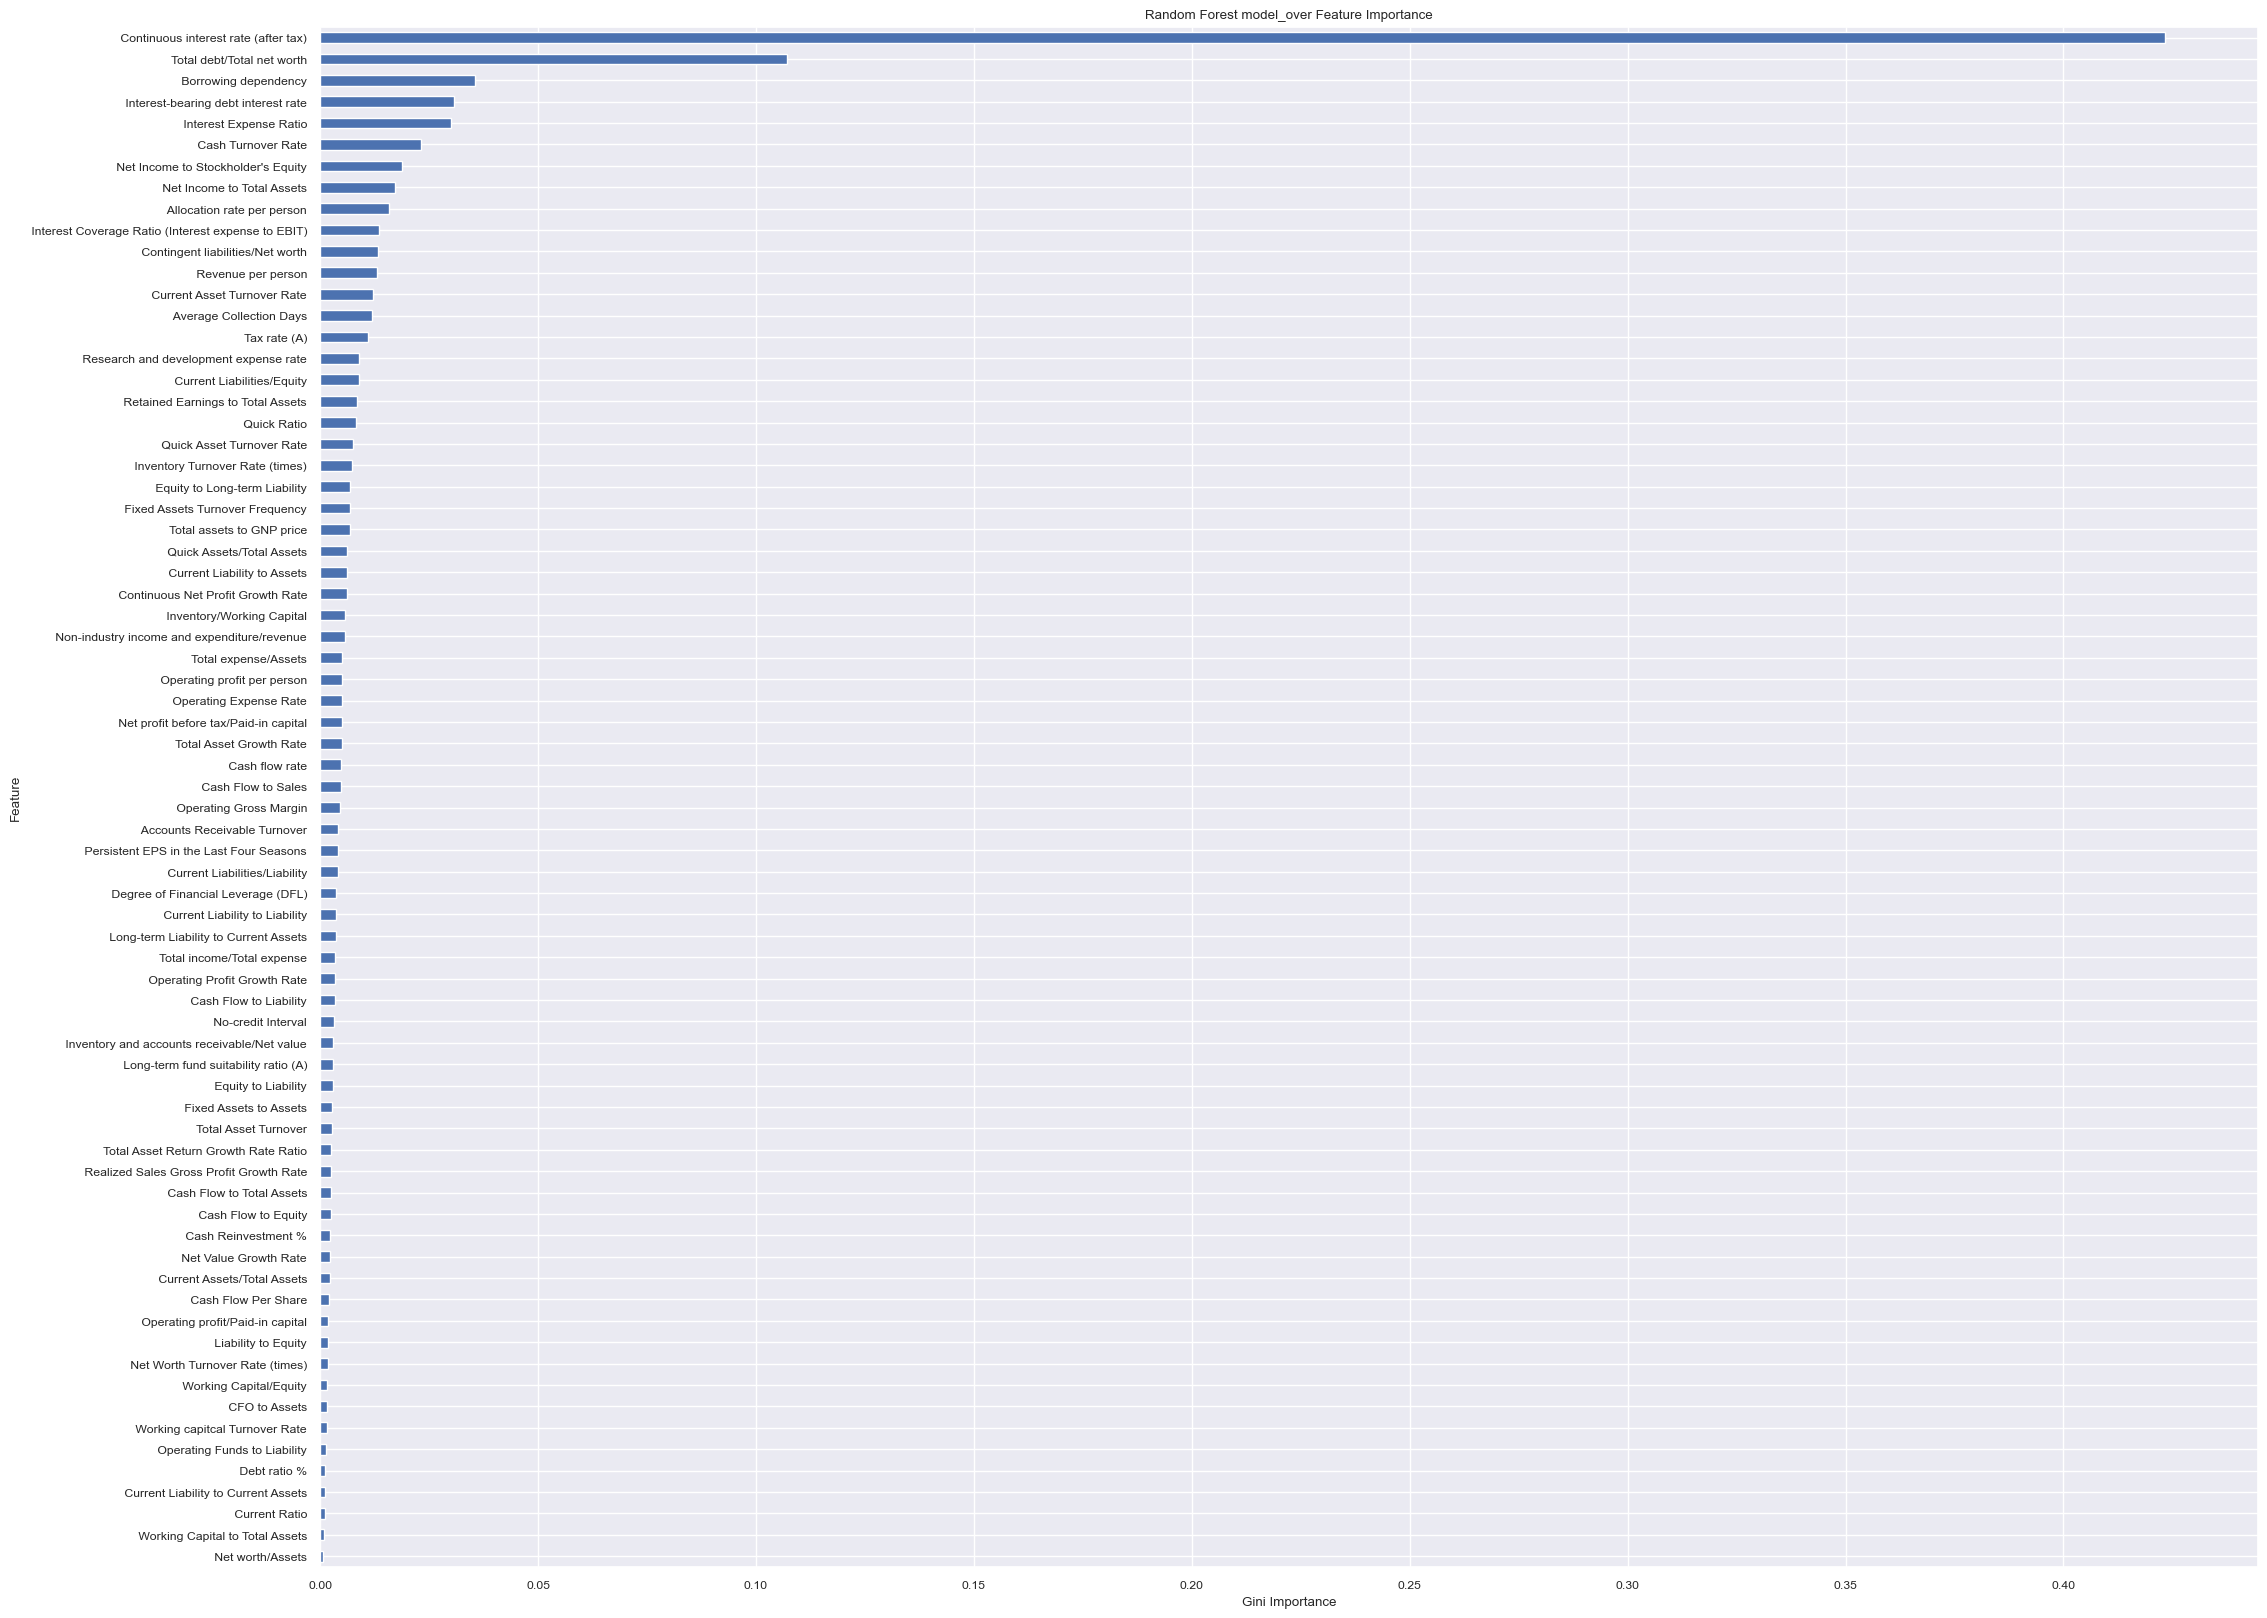

In [168]:
importances = classifier_sm.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Random Forest Model Evaluation

In [169]:
# Model Accuracy
y_pred= classifier_sm.predict(x_test_sm) 
print(classifier_sm)
print(accuracy_score(y_test_sm, y_pred))

RandomForestClassifier(criterion='entropy', max_features=72, n_estimators=80)
0.8925588458618071


In [170]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1276,   41],
       [ 242, 1075]], dtype=int64)

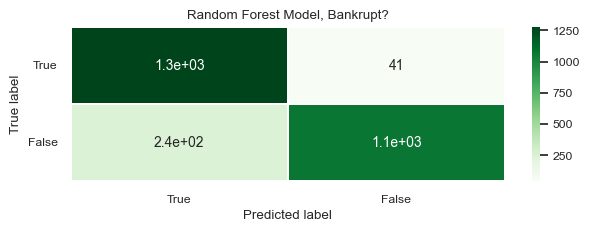

In [171]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Model, Bankrupt?')
plt.show()

In [172]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1317
           1       0.96      0.82      0.88      1317

    accuracy                           0.89      2634
   macro avg       0.90      0.89      0.89      2634
weighted avg       0.90      0.89      0.89      2634



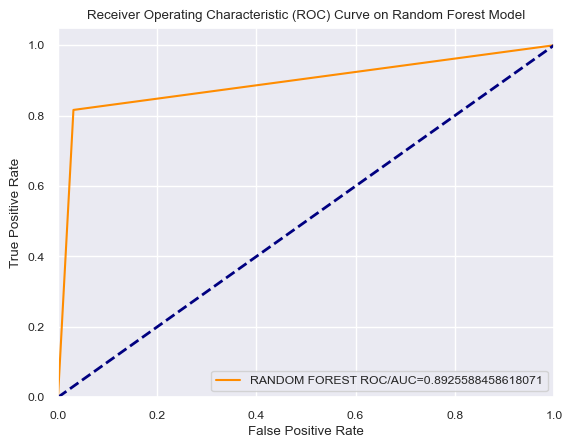

In [173]:
fpr_random_forest_sm, tpr_random_forest_sm, _ = mt.roc_curve(y_test_sm,  y_pred)
auc_random_forest_sm = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_random_forest_sm,tpr_random_forest_sm,label="RANDOM FOREST ROC/AUC="+str(auc_random_forest_sm),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### Random Forest Regresion

In [258]:
classifier_reg = RandomForestRegressor(n_estimators = 100, max_features= x.shape[1], max_depth = None)
classifier_reg

RandomForestRegressor(max_features=72)

In [259]:
classifier_reg_sm= classifier_reg.fit(x_train_sm, y_train_sm) 
classifier_reg_sm

RandomForestRegressor(max_features=72)

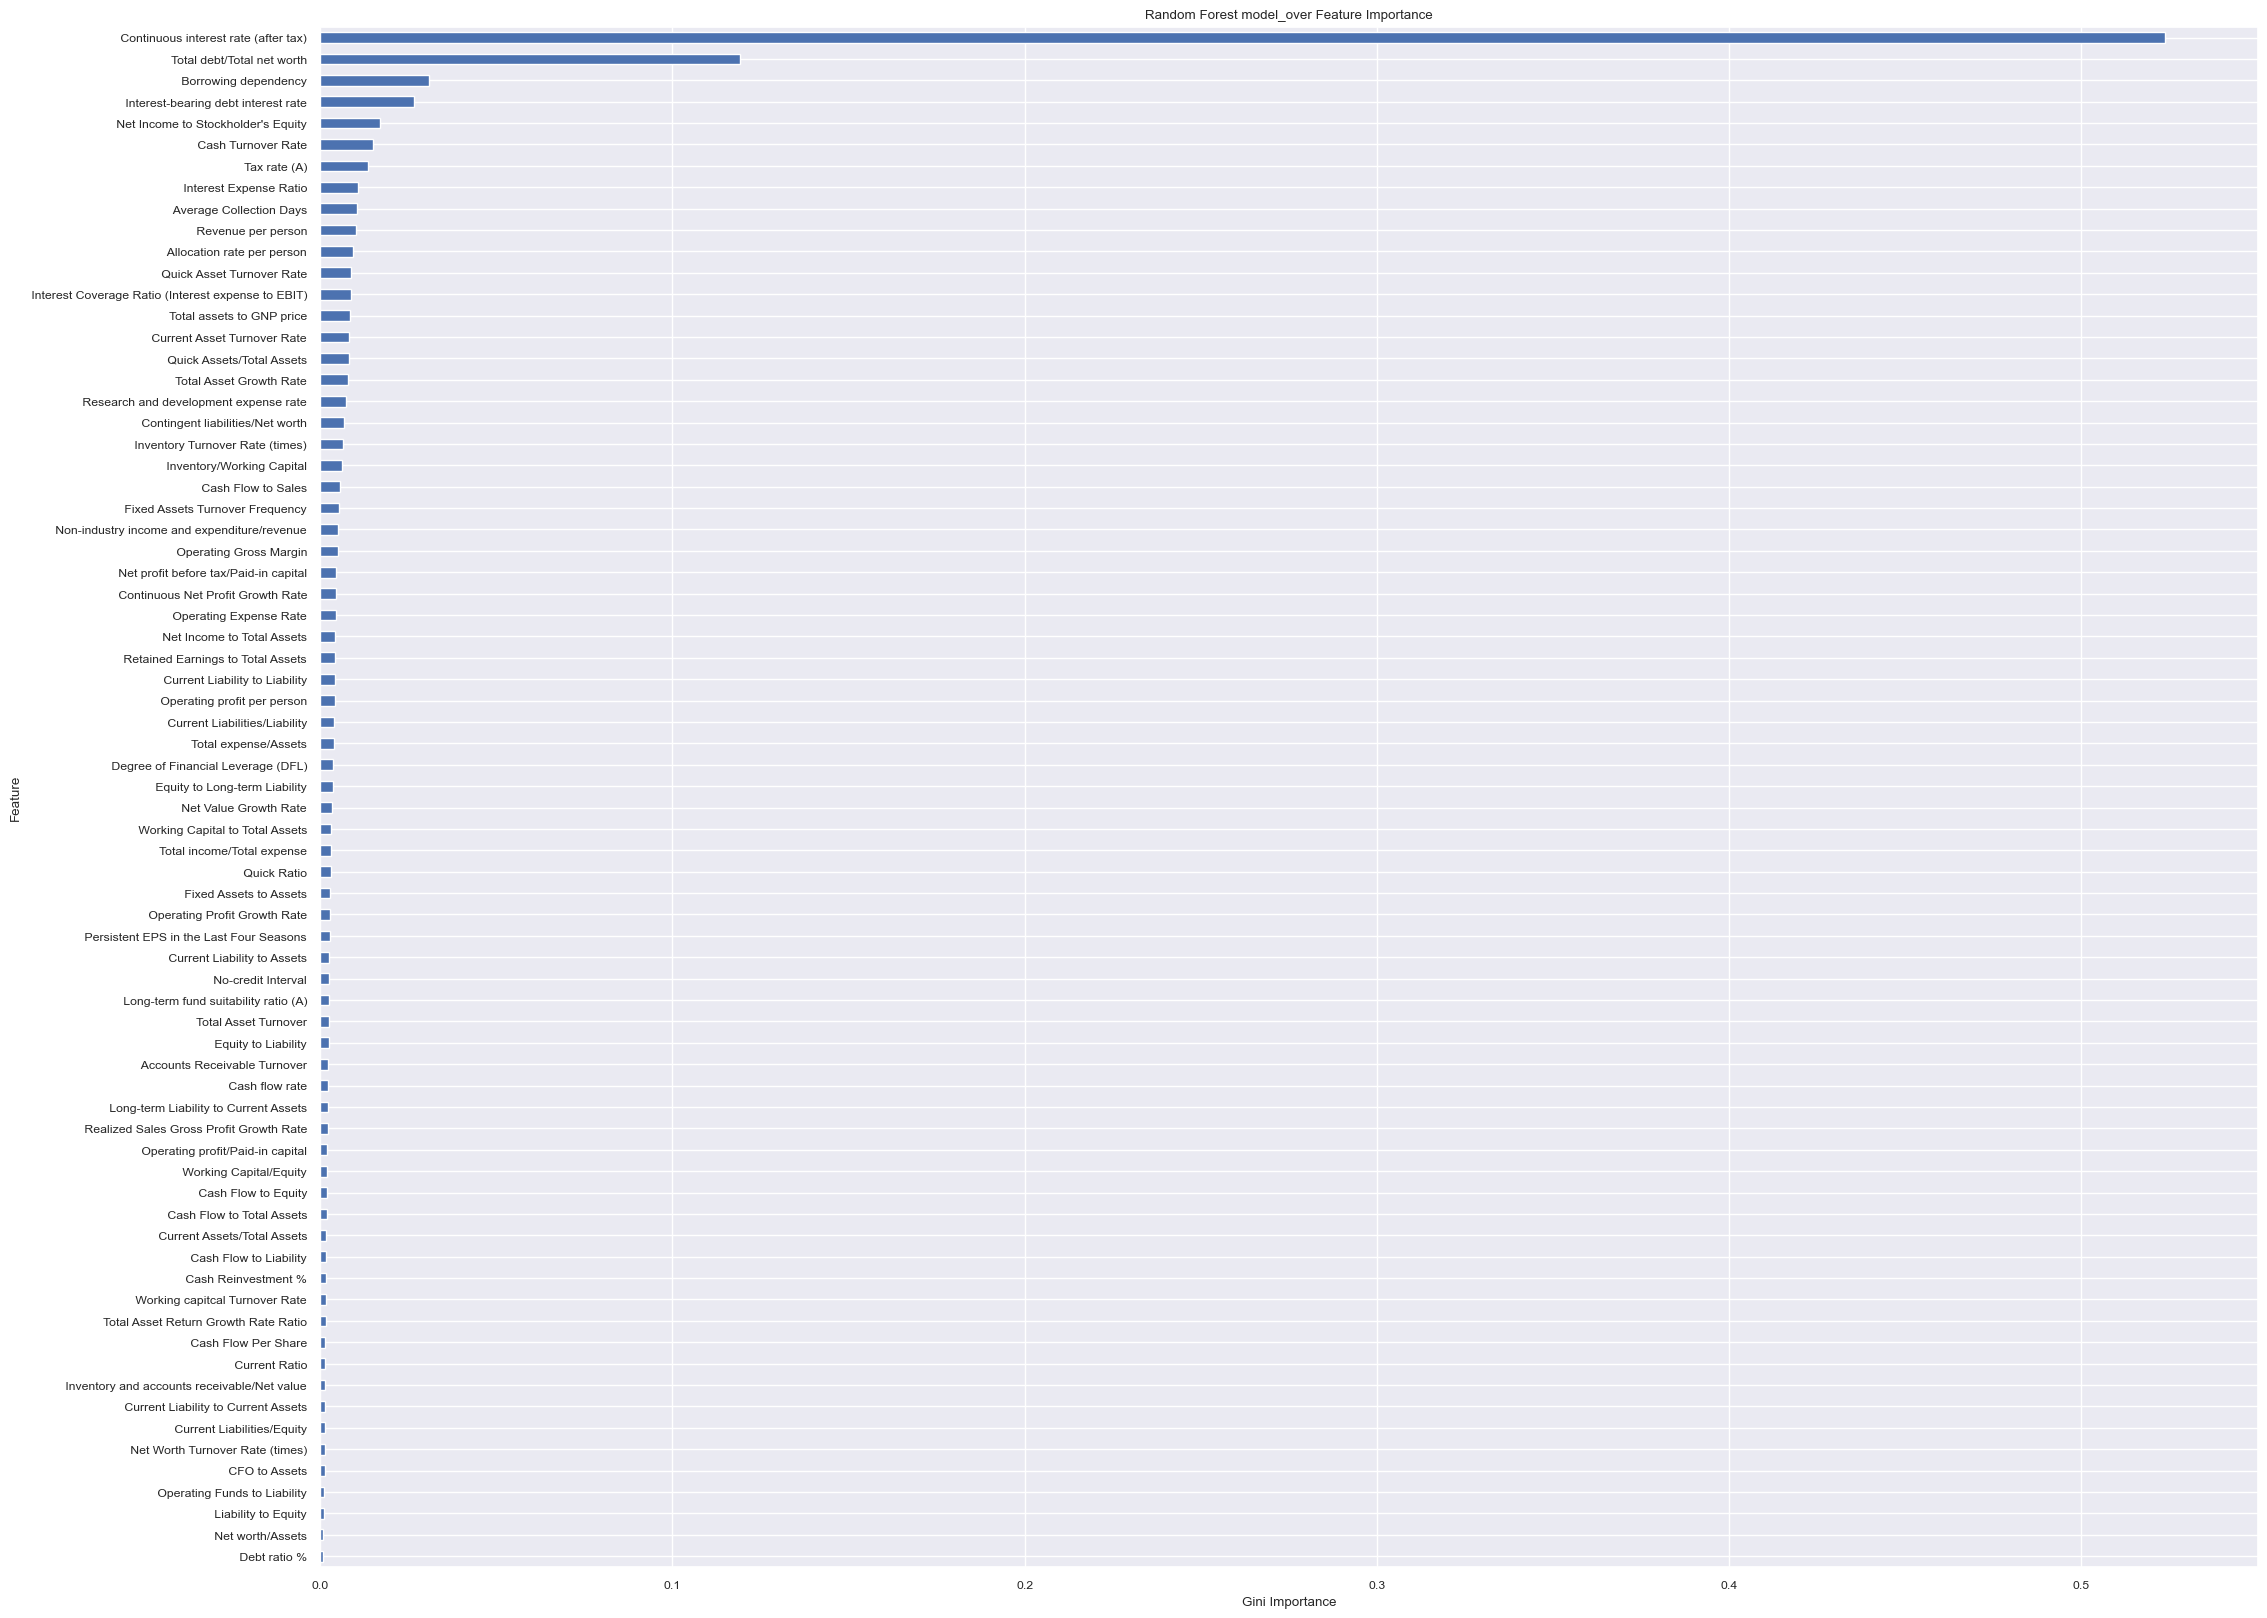

In [260]:
# sorted_idx = classifier_ros.feature_importances_.argsort()
# plt.barh(df.columns[sorted_idx], classifier_ros.feature_importances_[sorted_idx])
# plt.gcf().set_size_inches((25, 20))
# plt.xlabel("Random Forest Feature Importance")

importances = classifier_reg_sm.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Random Forest Regresion Evaluation

In [269]:
# Model Accuracy
y_pred= classifier_reg_sm.predict(x_test_sm) 
print('Regression Max Error: {0}'.format(mt.max_error(y_test_sm, y_pred)))
print('Mean Squared Error (MSE): {0}'.format(mt.mean_squared_error(y_test_sm, y_pred)))
print('Mean Absolute Error (MAE): {0}'.format(mt.mean_absolute_error(y_test_sm, y_pred)))

Regression Max Error: 1.0
Mean Squared Error (MSE): 0.0925399772209567
Mean Absolute Error (MAE): 0.16734624145785879


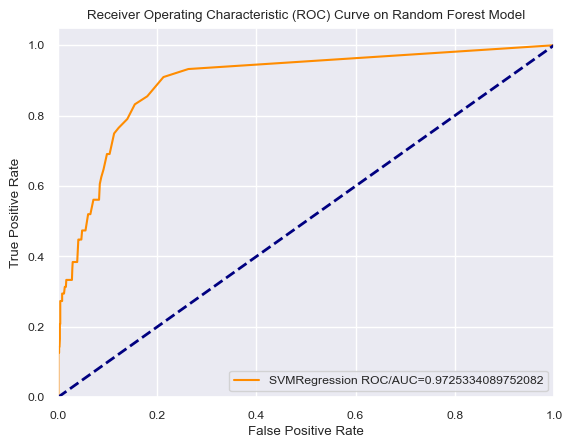

In [270]:
fpr_rf_reg_sm, tpr_rf_reg_sm, _ = mt.roc_curve(y_test_sm,  y_pred)
auc_rf_reg_sm = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_rf_reg_ros,tpr_rf_reg_ros,label="SVMRegression ROC/AUC="+str(auc_rf_reg_sm),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(b). Decision Tree Algorithm

[Text(0.5087911014988524, 0.9886363636363636, 'X[2] <= 0.782\ngini = 0.5\nsamples = 10564\nvalue = [5282, 5282]'),
 Text(0.18439189691709645, 0.9659090909090909, 'X[20] <= 0.006\ngini = 0.306\nsamples = 5950\nvalue = [1123, 4827]'),
 Text(0.07238082558692929, 0.9431818181818182, 'X[67] <= 0.835\ngini = 0.313\nsamples = 623\nvalue = [502, 121]'),
 Text(0.030919964328396977, 0.9204545454545454, 'X[37] <= 0.001\ngini = 0.433\nsamples = 120\nvalue = [38, 82]'),
 Text(0.011243623392144355, 0.8977272727272727, 'X[36] <= 0.386\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.005621811696072177, 0.875, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.016865435088216533, 0.875, 'X[57] <= 0.864\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.011243623392144355, 0.8522727272727273, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.02248724678428871, 0.8522727272727273, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0505963052646496, 0.8977272727272727, 'X[36] <= 0.378\ngi

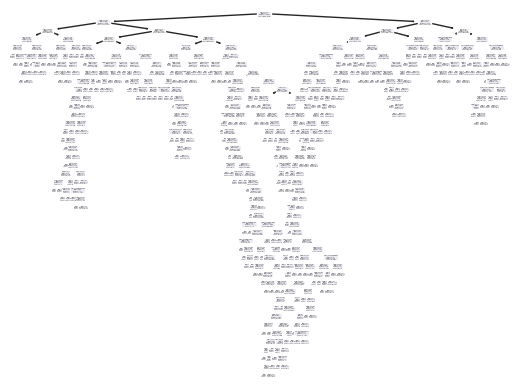

In [174]:
clf = tree.DecisionTreeClassifier()
clf_sm = clf.fit(x_train_sm, y_train_sm)
tree.plot_tree(clf_sm)

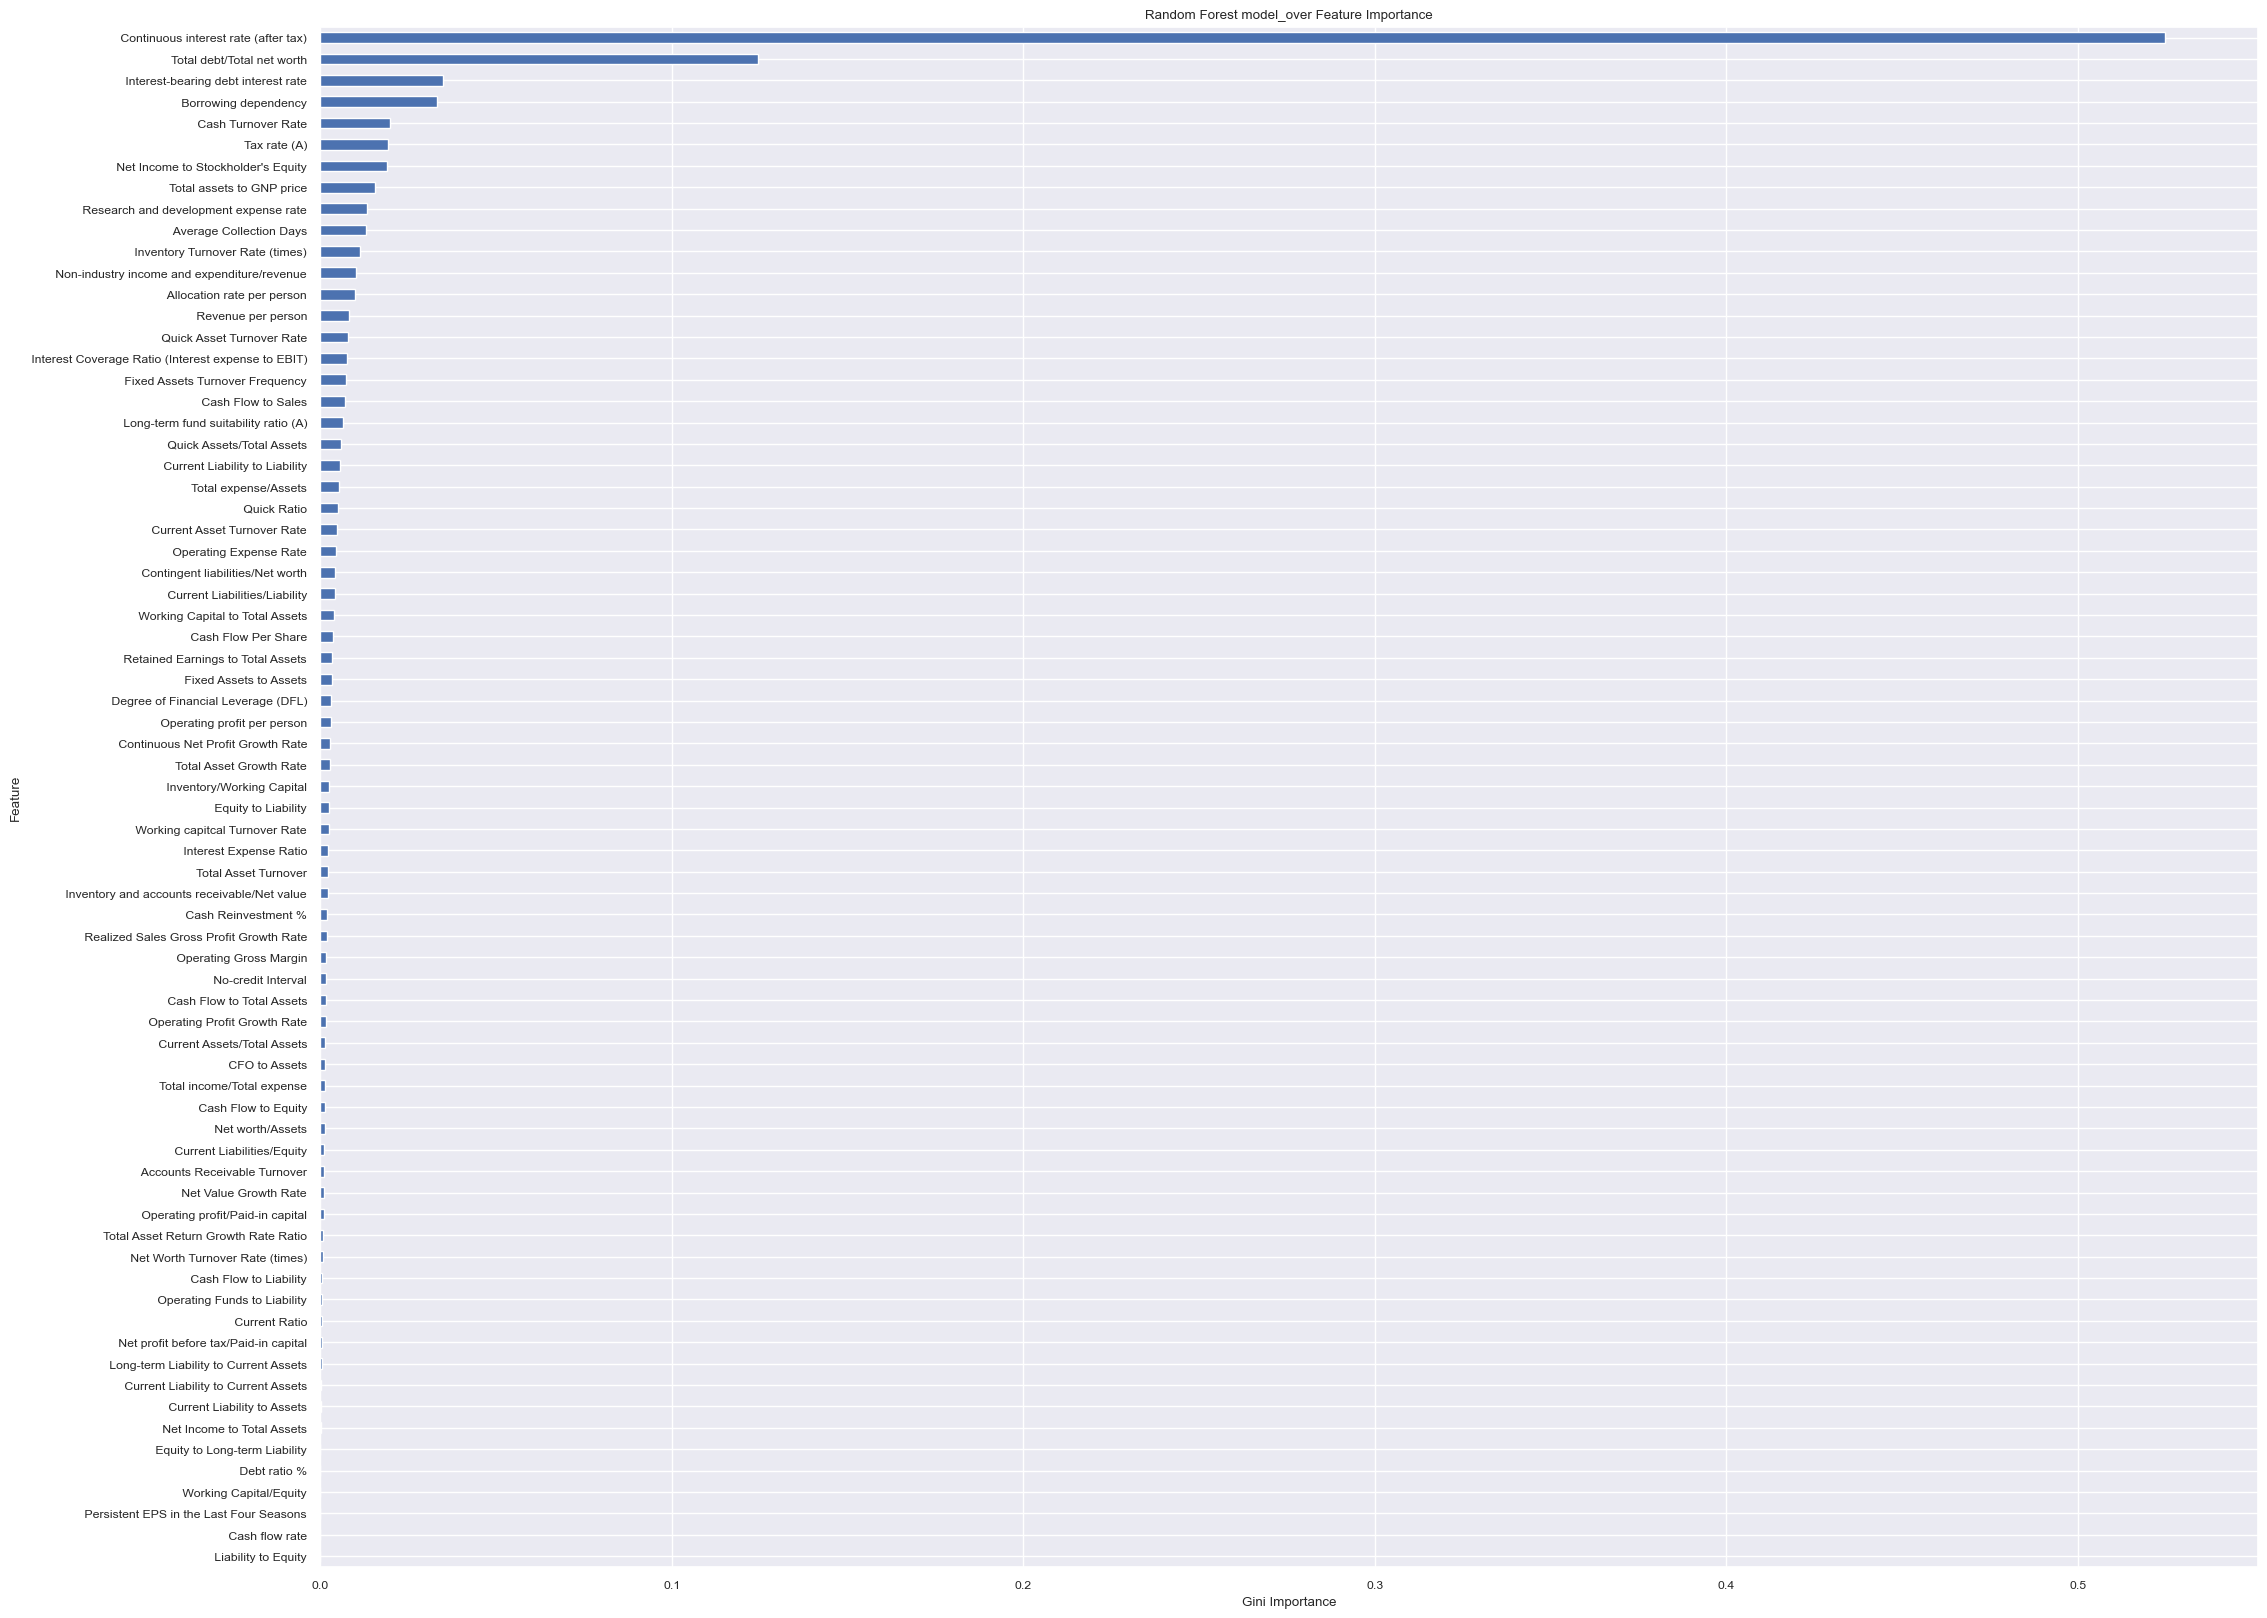

In [175]:
importances = clf_sm.feature_importances_

feat_imp = pd.Series(importances, index=x_train_ros.columns).sort_values()

# Plot series
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Random Forest model_over Feature Importance");
plt.gcf().set_size_inches((25, 20))

### Decision Tree Model Evaluation

In [176]:
y_pred= clf_ros.predict(x_test_sm) 
print(clf_sm)
print(accuracy_score(y_test_sm, y_pred))

DecisionTreeClassifier()
0.6890660592255126


In [177]:
matrix = confusion_matrix(y_test_sm, y_pred)  
matrix

array([[1288,   29],
       [ 790,  527]], dtype=int64)

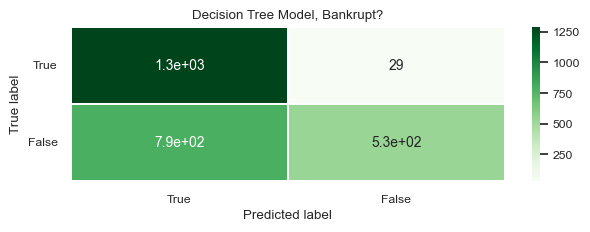

In [178]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Decision Tree Model, Bankrupt?')
plt.show()

In [179]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76      1317
           1       0.95      0.40      0.56      1317

    accuracy                           0.69      2634
   macro avg       0.78      0.69      0.66      2634
weighted avg       0.78      0.69      0.66      2634



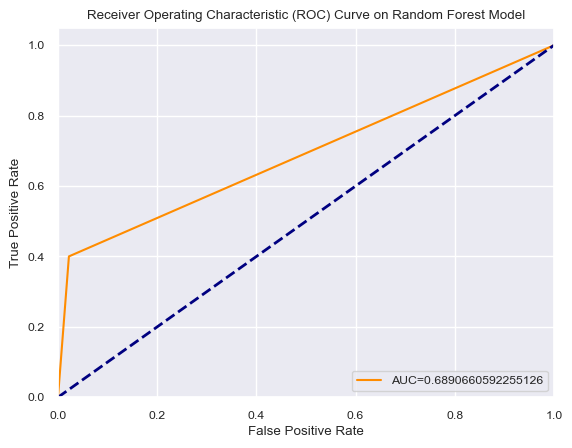

In [180]:
fpr_decision_tree_sm, tpr_decision_tree_sm, _ = mt.roc_curve(y_test_sm,  y_pred)
auc_decision_tree_sm = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_decision_tree_sm,tpr_decision_tree_sm,label="AUC="+str(auc_decision_tree_sm),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(c). Support Vectore Machine (SVM) Algorithm

#### Used Support Vectore Classifier

In [181]:
svmC = svm.SVC()
svm_sm = svmC.fit(x_train_sm, y_train_sm)

In [182]:
y_pred= svm_sm.predict(x_test_sm) 
print(svm_sm)
print(accuracy_score(y_test_sm, y_pred))

SVC()
0.7471526195899773


### Support Vector Machine Classifier Model Evaluation

In [183]:
matrix = confusion_matrix(y_test_ros, y_pred)  
matrix

array([[1039,  278],
       [ 388,  929]], dtype=int64)

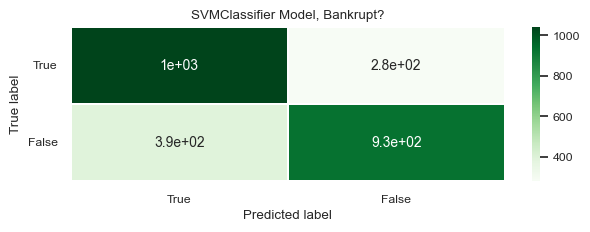

In [184]:
# Build the plot
plt.figure(figsize=(7,2))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SVMClassifier Model, Bankrupt?')
plt.show()

In [185]:
# Classification Report To gett Precision, Recall, and F1 Score
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1317
           1       0.77      0.71      0.74      1317

    accuracy                           0.75      2634
   macro avg       0.75      0.75      0.75      2634
weighted avg       0.75      0.75      0.75      2634



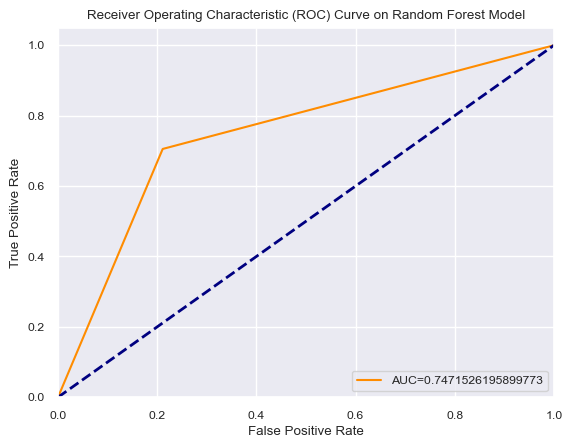

In [186]:
fpr_svmc_sm, tpr_svmc_sm, _ = mt.roc_curve(y_test_sm,  y_pred)
auc_svmc_sm = mt.roc_auc_score(y_test_sm, y_pred)
lw = 2

#create ROC curve
plt.plot(fpr_svmc_sm,tpr_svmc_sm,label="AUC="+str(auc_svmc_sm),color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on Random Forest Model")
plt.show()

### C(d). Artificial Neural Network Algorithm

In [233]:
# Initialize ANN 
ann = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
## 1. units:- number of neurons that will be present in the respective layer
## 2. activation:- specify which activation function to be used
ann.add(tf.keras.layers.Dense(units=x.shape[1],activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=x.shape[1],activation="relu"))

#Adding Output Layer
## Because This is a binary classification (output either 0 or 1) than I only need 1 neuron
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
## 1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent.
## 2. loss:- specifies which loss function should be used.
## 3. metrics:- which performance metrics to be used in order to compute performance.
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Fitting ANN to build a model from splitting datasetset
## 3.batch_size: how many observations should be there in the batch
## 4. epochs: How many times neural networks will be trained.
ann_ros = ann.fit(x_train_sm, y_train_sm,batch_size=3000,epochs = 1000, validation_data=(x_test_sm, y_test_sm))

Epoch 1/1000
4/4 [==============================] - 0s 45ms/step - loss: 441839104.0000 - accuracy: 0.5094 - val_loss: 144532816.0000 - val_accuracy: 0.5983
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 125031024.0000 - accuracy: 0.5602 - val_loss: 181957792.0000 - val_accuracy: 0.5110
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 168338464.0000 - accuracy: 0.5110 - val_loss: 97847696.0000 - val_accuracy: 0.5653
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 71541592.0000 - accuracy: 0.5823 - val_loss: 63112936.0000 - val_accuracy: 0.6401
Epoch 5/1000
4/4 [==============================] - 0s 14ms/step - loss: 81654696.0000 - accuracy: 0.5721 - val_loss: 62034868.0000 - val_accuracy: 0.5904
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 53231312.0000 - accuracy: 0.5954 - val_loss: 34521968.0000 - val_accuracy: 0.6541
Epoch 7/1000
4/4 [==============================] - 0s 11ms/step 

Epoch 54/1000
4/4 [==============================] - 0s 10ms/step - loss: 1839384.3750 - accuracy: 0.7959 - val_loss: 14005756.0000 - val_accuracy: 0.6488
Epoch 55/1000
4/4 [==============================] - 0s 9ms/step - loss: 2063468.6250 - accuracy: 0.7799 - val_loss: 15795324.0000 - val_accuracy: 0.6367
Epoch 56/1000
4/4 [==============================] - 0s 10ms/step - loss: 1958682.8750 - accuracy: 0.7900 - val_loss: 14848128.0000 - val_accuracy: 0.6591
Epoch 57/1000
4/4 [==============================] - 0s 10ms/step - loss: 1835550.6250 - accuracy: 0.7933 - val_loss: 13738701.0000 - val_accuracy: 0.6295
Epoch 58/1000
4/4 [==============================] - 0s 9ms/step - loss: 1627367.8750 - accuracy: 0.8040 - val_loss: 14239458.0000 - val_accuracy: 0.6583
Epoch 59/1000
4/4 [==============================] - 0s 11ms/step - loss: 1603981.8750 - accuracy: 0.8142 - val_loss: 16303340.0000 - val_accuracy: 0.6401
Epoch 60/1000
4/4 [==============================] - 0s 10ms/step - loss

Epoch 107/1000
4/4 [==============================] - 0s 9ms/step - loss: 1196052.1250 - accuracy: 0.8316 - val_loss: 15838434.0000 - val_accuracy: 0.6279
Epoch 108/1000
4/4 [==============================] - 0s 9ms/step - loss: 1476960.0000 - accuracy: 0.8037 - val_loss: 12956430.0000 - val_accuracy: 0.6143
Epoch 109/1000
4/4 [==============================] - 0s 10ms/step - loss: 1450464.2500 - accuracy: 0.8164 - val_loss: 13533923.0000 - val_accuracy: 0.6310
Epoch 110/1000
4/4 [==============================] - 0s 12ms/step - loss: 1285726.5000 - accuracy: 0.8277 - val_loss: 14601313.0000 - val_accuracy: 0.6450
Epoch 111/1000
4/4 [==============================] - 0s 14ms/step - loss: 1266146.3750 - accuracy: 0.8176 - val_loss: 14394181.0000 - val_accuracy: 0.6359
Epoch 112/1000
4/4 [==============================] - 0s 12ms/step - loss: 1151718.8750 - accuracy: 0.8363 - val_loss: 13456099.0000 - val_accuracy: 0.6158
Epoch 113/1000
4/4 [==============================] - 0s 10ms/step

Epoch 160/1000
4/4 [==============================] - 0s 10ms/step - loss: 903982.1250 - accuracy: 0.8537 - val_loss: 15817757.0000 - val_accuracy: 0.6390
Epoch 161/1000
4/4 [==============================] - 0s 10ms/step - loss: 839324.8125 - accuracy: 0.8595 - val_loss: 13645571.0000 - val_accuracy: 0.6090
Epoch 162/1000
4/4 [==============================] - 0s 9ms/step - loss: 1053758.1250 - accuracy: 0.8263 - val_loss: 13861091.0000 - val_accuracy: 0.6591
Epoch 163/1000
4/4 [==============================] - 0s 9ms/step - loss: 964303.5625 - accuracy: 0.8386 - val_loss: 16345439.0000 - val_accuracy: 0.6249
Epoch 164/1000
4/4 [==============================] - 0s 10ms/step - loss: 1059240.8750 - accuracy: 0.8274 - val_loss: 13097406.0000 - val_accuracy: 0.6401
Epoch 165/1000
4/4 [==============================] - 0s 9ms/step - loss: 1166589.3750 - accuracy: 0.8212 - val_loss: 12706497.0000 - val_accuracy: 0.6716
Epoch 166/1000
4/4 [==============================] - 0s 9ms/step - lo

Epoch 213/1000
4/4 [==============================] - 0s 10ms/step - loss: 872300.1875 - accuracy: 0.8371 - val_loss: 13546540.0000 - val_accuracy: 0.6503
Epoch 214/1000
4/4 [==============================] - 0s 10ms/step - loss: 743080.5000 - accuracy: 0.8519 - val_loss: 14663447.0000 - val_accuracy: 0.6325
Epoch 215/1000
4/4 [==============================] - 0s 10ms/step - loss: 767066.8125 - accuracy: 0.8636 - val_loss: 14034252.0000 - val_accuracy: 0.5862
Epoch 216/1000
4/4 [==============================] - 0s 11ms/step - loss: 785853.0625 - accuracy: 0.8533 - val_loss: 15020346.0000 - val_accuracy: 0.6264
Epoch 217/1000
4/4 [==============================] - 0s 12ms/step - loss: 737745.5625 - accuracy: 0.8545 - val_loss: 13915925.0000 - val_accuracy: 0.5945
Epoch 218/1000
4/4 [==============================] - 0s 11ms/step - loss: 612086.8750 - accuracy: 0.8622 - val_loss: 16623305.0000 - val_accuracy: 0.6177
Epoch 219/1000
4/4 [==============================] - 0s 13ms/step - l

Epoch 266/1000
4/4 [==============================] - 0s 10ms/step - loss: 972635.1250 - accuracy: 0.8395 - val_loss: 13098024.0000 - val_accuracy: 0.6124
Epoch 267/1000
4/4 [==============================] - 0s 10ms/step - loss: 1027115.6250 - accuracy: 0.8352 - val_loss: 14265197.0000 - val_accuracy: 0.6386
Epoch 268/1000
4/4 [==============================] - 0s 9ms/step - loss: 1058021.0000 - accuracy: 0.8356 - val_loss: 15161697.0000 - val_accuracy: 0.6317
Epoch 269/1000
4/4 [==============================] - 0s 9ms/step - loss: 994787.3750 - accuracy: 0.8374 - val_loss: 13816369.0000 - val_accuracy: 0.6253
Epoch 270/1000
4/4 [==============================] - 0s 9ms/step - loss: 1076162.0000 - accuracy: 0.8446 - val_loss: 13781325.0000 - val_accuracy: 0.6173
Epoch 271/1000
4/4 [==============================] - 0s 9ms/step - loss: 954546.5625 - accuracy: 0.8508 - val_loss: 14395345.0000 - val_accuracy: 0.6371
Epoch 272/1000
4/4 [==============================] - 0s 10ms/step - lo

Epoch 319/1000
4/4 [==============================] - 0s 9ms/step - loss: 556144.7500 - accuracy: 0.8710 - val_loss: 15098209.0000 - val_accuracy: 0.6291
Epoch 320/1000
4/4 [==============================] - 0s 9ms/step - loss: 485025.9688 - accuracy: 0.8787 - val_loss: 14826371.0000 - val_accuracy: 0.6317
Epoch 321/1000
4/4 [==============================] - 0s 10ms/step - loss: 482739.9062 - accuracy: 0.8700 - val_loss: 15747672.0000 - val_accuracy: 0.6181
Epoch 322/1000
4/4 [==============================] - 0s 9ms/step - loss: 634325.5625 - accuracy: 0.8536 - val_loss: 12758695.0000 - val_accuracy: 0.6014
Epoch 323/1000
4/4 [==============================] - 0s 10ms/step - loss: 966848.6875 - accuracy: 0.8354 - val_loss: 15825394.0000 - val_accuracy: 0.6241
Epoch 324/1000
4/4 [==============================] - 0s 9ms/step - loss: 687988.5625 - accuracy: 0.8616 - val_loss: 15430007.0000 - val_accuracy: 0.6329
Epoch 325/1000
4/4 [==============================] - 0s 9ms/step - loss: 

4/4 [==============================] - 0s 10ms/step - loss: 426720.5938 - accuracy: 0.8887 - val_loss: 15881955.0000 - val_accuracy: 0.6116
Epoch 373/1000
4/4 [==============================] - 0s 9ms/step - loss: 497724.4375 - accuracy: 0.8743 - val_loss: 15275262.0000 - val_accuracy: 0.5888
Epoch 374/1000
4/4 [==============================] - 0s 9ms/step - loss: 808060.6250 - accuracy: 0.8421 - val_loss: 15189892.0000 - val_accuracy: 0.6181
Epoch 375/1000
4/4 [==============================] - 0s 9ms/step - loss: 533340.9375 - accuracy: 0.8735 - val_loss: 14485302.0000 - val_accuracy: 0.6317
Epoch 376/1000
4/4 [==============================] - 0s 10ms/step - loss: 642298.5000 - accuracy: 0.8575 - val_loss: 14180574.0000 - val_accuracy: 0.6048
Epoch 377/1000
4/4 [==============================] - 0s 10ms/step - loss: 584738.4375 - accuracy: 0.8699 - val_loss: 17348548.0000 - val_accuracy: 0.6082
Epoch 378/1000
4/4 [==============================] - 0s 10ms/step - loss: 595016.4375 -

4/4 [==============================] - 0s 9ms/step - loss: 896144.0625 - accuracy: 0.8489 - val_loss: 15582285.0000 - val_accuracy: 0.6401
Epoch 426/1000
4/4 [==============================] - 0s 10ms/step - loss: 608852.9375 - accuracy: 0.8784 - val_loss: 18443002.0000 - val_accuracy: 0.6105
Epoch 427/1000
4/4 [==============================] - 0s 9ms/step - loss: 705661.8125 - accuracy: 0.8656 - val_loss: 17550078.0000 - val_accuracy: 0.6181
Epoch 428/1000
4/4 [==============================] - 0s 9ms/step - loss: 623810.1875 - accuracy: 0.8590 - val_loss: 14207592.0000 - val_accuracy: 0.5839
Epoch 429/1000
4/4 [==============================] - 0s 9ms/step - loss: 766405.6250 - accuracy: 0.8580 - val_loss: 17124910.0000 - val_accuracy: 0.6253
Epoch 430/1000
4/4 [==============================] - 0s 9ms/step - loss: 521179.3125 - accuracy: 0.8828 - val_loss: 15734192.0000 - val_accuracy: 0.6241
Epoch 431/1000
4/4 [==============================] - 0s 9ms/step - loss: 470569.0000 - ac

4/4 [==============================] - 0s 9ms/step - loss: 532765.7500 - accuracy: 0.8769 - val_loss: 16852498.0000 - val_accuracy: 0.6230
Epoch 479/1000
4/4 [==============================] - 0s 10ms/step - loss: 478926.0312 - accuracy: 0.8772 - val_loss: 14648445.0000 - val_accuracy: 0.6352
Epoch 480/1000
4/4 [==============================] - 0s 9ms/step - loss: 482592.5312 - accuracy: 0.8864 - val_loss: 16885910.0000 - val_accuracy: 0.6314
Epoch 481/1000
4/4 [==============================] - 0s 9ms/step - loss: 414197.0312 - accuracy: 0.8833 - val_loss: 15651783.0000 - val_accuracy: 0.5858
Epoch 482/1000
4/4 [==============================] - 0s 9ms/step - loss: 797643.0000 - accuracy: 0.8443 - val_loss: 19185642.0000 - val_accuracy: 0.5979
Epoch 483/1000
4/4 [==============================] - 0s 9ms/step - loss: 1277922.8750 - accuracy: 0.8204 - val_loss: 16263283.0000 - val_accuracy: 0.6371
Epoch 484/1000
4/4 [==============================] - 0s 10ms/step - loss: 654103.4375 - 

4/4 [==============================] - 0s 10ms/step - loss: 1114967.3750 - accuracy: 0.8260 - val_loss: 18670758.0000 - val_accuracy: 0.6257
Epoch 532/1000
4/4 [==============================] - 0s 9ms/step - loss: 970727.0000 - accuracy: 0.8505 - val_loss: 20989774.0000 - val_accuracy: 0.6120
Epoch 533/1000
4/4 [==============================] - 0s 10ms/step - loss: 841832.8125 - accuracy: 0.8541 - val_loss: 16216153.0000 - val_accuracy: 0.6374
Epoch 534/1000
4/4 [==============================] - 0s 10ms/step - loss: 882764.3125 - accuracy: 0.8372 - val_loss: 15106253.0000 - val_accuracy: 0.6519
Epoch 535/1000
4/4 [==============================] - 0s 10ms/step - loss: 944041.0625 - accuracy: 0.8603 - val_loss: 21298282.0000 - val_accuracy: 0.6029
Epoch 536/1000
4/4 [==============================] - 0s 11ms/step - loss: 722284.2500 - accuracy: 0.8703 - val_loss: 17154348.0000 - val_accuracy: 0.6302
Epoch 537/1000
4/4 [==============================] - 0s 10ms/step - loss: 633674.437

4/4 [==============================] - 0s 11ms/step - loss: 481494.8125 - accuracy: 0.8759 - val_loss: 19518498.0000 - val_accuracy: 0.6093
Epoch 585/1000
4/4 [==============================] - 0s 11ms/step - loss: 849328.3125 - accuracy: 0.8393 - val_loss: 15946586.0000 - val_accuracy: 0.6333
Epoch 586/1000
4/4 [==============================] - 0s 20ms/step - loss: 845775.7500 - accuracy: 0.8531 - val_loss: 17663986.0000 - val_accuracy: 0.6427
Epoch 587/1000
4/4 [==============================] - 0s 18ms/step - loss: 511500.7812 - accuracy: 0.8897 - val_loss: 21171750.0000 - val_accuracy: 0.6044
Epoch 588/1000
4/4 [==============================] - 0s 13ms/step - loss: 757076.7500 - accuracy: 0.8546 - val_loss: 16563084.0000 - val_accuracy: 0.6382
Epoch 589/1000
4/4 [==============================] - 0s 14ms/step - loss: 1101817.2500 - accuracy: 0.8317 - val_loss: 15601639.0000 - val_accuracy: 0.6029
Epoch 590/1000
4/4 [==============================] - 0s 13ms/step - loss: 1211707.6

Epoch 637/1000
4/4 [==============================] - 0s 10ms/step - loss: 385539.8438 - accuracy: 0.8898 - val_loss: 23909444.0000 - val_accuracy: 0.5801
Epoch 638/1000
4/4 [==============================] - 0s 9ms/step - loss: 1408239.2500 - accuracy: 0.8013 - val_loss: 16996000.0000 - val_accuracy: 0.6526
Epoch 639/1000
4/4 [==============================] - 0s 10ms/step - loss: 891587.5000 - accuracy: 0.8605 - val_loss: 17650964.0000 - val_accuracy: 0.6446
Epoch 640/1000
4/4 [==============================] - 0s 10ms/step - loss: 747983.7500 - accuracy: 0.8669 - val_loss: 22853936.0000 - val_accuracy: 0.5873
Epoch 641/1000
4/4 [==============================] - 0s 10ms/step - loss: 807229.3750 - accuracy: 0.8474 - val_loss: 16220508.0000 - val_accuracy: 0.6215
Epoch 642/1000
4/4 [==============================] - 0s 10ms/step - loss: 1030056.5000 - accuracy: 0.8469 - val_loss: 22507762.0000 - val_accuracy: 0.6029
Epoch 643/1000
4/4 [==============================] - 0s 9ms/step - l

Epoch 690/1000
4/4 [==============================] - 0s 10ms/step - loss: 544721.0625 - accuracy: 0.8733 - val_loss: 20197972.0000 - val_accuracy: 0.6412
Epoch 691/1000
4/4 [==============================] - 0s 10ms/step - loss: 417885.1562 - accuracy: 0.8948 - val_loss: 19679756.0000 - val_accuracy: 0.5991
Epoch 692/1000
4/4 [==============================] - 0s 10ms/step - loss: 610880.4375 - accuracy: 0.8741 - val_loss: 23662640.0000 - val_accuracy: 0.6097
Epoch 693/1000
4/4 [==============================] - 0s 9ms/step - loss: 470850.8750 - accuracy: 0.8693 - val_loss: 20233026.0000 - val_accuracy: 0.6207
Epoch 694/1000
4/4 [==============================] - 0s 10ms/step - loss: 390735.5625 - accuracy: 0.9017 - val_loss: 21220956.0000 - val_accuracy: 0.5835
Epoch 695/1000
4/4 [==============================] - 0s 10ms/step - loss: 520748.7812 - accuracy: 0.8770 - val_loss: 23115200.0000 - val_accuracy: 0.6002
Epoch 696/1000
4/4 [==============================] - 0s 10ms/step - lo

Epoch 743/1000
4/4 [==============================] - 0s 11ms/step - loss: 372075.2812 - accuracy: 0.8981 - val_loss: 16853440.0000 - val_accuracy: 0.6325
Epoch 744/1000
4/4 [==============================] - 0s 10ms/step - loss: 462167.3438 - accuracy: 0.8798 - val_loss: 15880736.0000 - val_accuracy: 0.6333
Epoch 745/1000
4/4 [==============================] - 0s 10ms/step - loss: 401049.0625 - accuracy: 0.8949 - val_loss: 17812432.0000 - val_accuracy: 0.6139
Epoch 746/1000
4/4 [==============================] - 0s 9ms/step - loss: 542307.0625 - accuracy: 0.8722 - val_loss: 15962311.0000 - val_accuracy: 0.6181
Epoch 747/1000
4/4 [==============================] - 0s 11ms/step - loss: 795404.1875 - accuracy: 0.8413 - val_loss: 14987146.0000 - val_accuracy: 0.6515
Epoch 748/1000
4/4 [==============================] - 0s 11ms/step - loss: 652480.9375 - accuracy: 0.8743 - val_loss: 21550184.0000 - val_accuracy: 0.5885
Epoch 749/1000
4/4 [==============================] - 0s 11ms/step - lo

Epoch 796/1000
4/4 [==============================] - 0s 10ms/step - loss: 498159.9062 - accuracy: 0.8768 - val_loss: 17247434.0000 - val_accuracy: 0.5957
Epoch 797/1000
4/4 [==============================] - 0s 9ms/step - loss: 462826.1562 - accuracy: 0.8902 - val_loss: 19223556.0000 - val_accuracy: 0.6200
Epoch 798/1000
4/4 [==============================] - 0s 10ms/step - loss: 450669.3750 - accuracy: 0.8817 - val_loss: 19962508.0000 - val_accuracy: 0.5987
Epoch 799/1000
4/4 [==============================] - 0s 10ms/step - loss: 594740.0000 - accuracy: 0.8590 - val_loss: 17596112.0000 - val_accuracy: 0.6325
Epoch 800/1000
4/4 [==============================] - 0s 10ms/step - loss: 504531.8125 - accuracy: 0.8824 - val_loss: 20597192.0000 - val_accuracy: 0.6021
Epoch 801/1000
4/4 [==============================] - 0s 10ms/step - loss: 789583.6875 - accuracy: 0.8517 - val_loss: 17243004.0000 - val_accuracy: 0.5702
Epoch 802/1000
4/4 [==============================] - 0s 9ms/step - los

Epoch 849/1000
4/4 [==============================] - 0s 10ms/step - loss: 392900.1875 - accuracy: 0.8951 - val_loss: 20728244.0000 - val_accuracy: 0.6002
Epoch 850/1000
4/4 [==============================] - 0s 9ms/step - loss: 399988.2500 - accuracy: 0.8942 - val_loss: 19301234.0000 - val_accuracy: 0.5797
Epoch 851/1000
4/4 [==============================] - 0s 10ms/step - loss: 328018.0625 - accuracy: 0.9060 - val_loss: 19991718.0000 - val_accuracy: 0.5710
Epoch 852/1000
4/4 [==============================] - 0s 10ms/step - loss: 764271.0000 - accuracy: 0.8466 - val_loss: 22282866.0000 - val_accuracy: 0.5854
Epoch 853/1000
4/4 [==============================] - 0s 9ms/step - loss: 1049941.6250 - accuracy: 0.8286 - val_loss: 17984068.0000 - val_accuracy: 0.6427
Epoch 854/1000
4/4 [==============================] - 0s 10ms/step - loss: 969472.8750 - accuracy: 0.8495 - val_loss: 17073060.0000 - val_accuracy: 0.5904
Epoch 855/1000
4/4 [==============================] - 0s 10ms/step - lo

Epoch 902/1000
4/4 [==============================] - 0s 10ms/step - loss: 367140.0000 - accuracy: 0.9036 - val_loss: 22176146.0000 - val_accuracy: 0.5824
Epoch 903/1000
4/4 [==============================] - 0s 10ms/step - loss: 421983.7812 - accuracy: 0.8773 - val_loss: 21474080.0000 - val_accuracy: 0.6166
Epoch 904/1000
4/4 [==============================] - 0s 10ms/step - loss: 417668.5625 - accuracy: 0.8923 - val_loss: 19678870.0000 - val_accuracy: 0.5797
Epoch 905/1000
4/4 [==============================] - 0s 9ms/step - loss: 464352.8750 - accuracy: 0.8851 - val_loss: 21885870.0000 - val_accuracy: 0.6124
Epoch 906/1000
4/4 [==============================] - 0s 9ms/step - loss: 439594.0625 - accuracy: 0.8811 - val_loss: 18427590.0000 - val_accuracy: 0.5919
Epoch 907/1000
4/4 [==============================] - 0s 10ms/step - loss: 511954.4375 - accuracy: 0.8846 - val_loss: 20356330.0000 - val_accuracy: 0.5759
Epoch 908/1000
4/4 [==============================] - 0s 10ms/step - los

Epoch 955/1000
4/4 [==============================] - 0s 10ms/step - loss: 355766.3750 - accuracy: 0.9019 - val_loss: 21887106.0000 - val_accuracy: 0.6074
Epoch 956/1000
4/4 [==============================] - 0s 9ms/step - loss: 456882.8750 - accuracy: 0.8747 - val_loss: 18620580.0000 - val_accuracy: 0.5706
Epoch 957/1000
4/4 [==============================] - 0s 9ms/step - loss: 556078.3750 - accuracy: 0.8716 - val_loss: 22290716.0000 - val_accuracy: 0.5945
Epoch 958/1000
4/4 [==============================] - 0s 10ms/step - loss: 490612.8438 - accuracy: 0.8856 - val_loss: 23595146.0000 - val_accuracy: 0.5919
Epoch 959/1000
4/4 [==============================] - 0s 9ms/step - loss: 431213.3750 - accuracy: 0.8906 - val_loss: 20285592.0000 - val_accuracy: 0.6006
Epoch 960/1000
4/4 [==============================] - 0s 9ms/step - loss: 410029.9375 - accuracy: 0.8975 - val_loss: 21696646.0000 - val_accuracy: 0.6158
Epoch 961/1000
4/4 [==============================] - 0s 9ms/step - loss: 

In [234]:
# evaluate the model
scores = ann.evaluate(x_test_sm, y_test_sm)

print('\nTrain loss:', ann_ros.history['loss'][-1])
print("Train %s: %.2f%%" % (ann.metrics_names[1], ann_ros.history['accuracy'][-1]*100))

print('\nTest loss:', scores[0])
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

83/83 [==============================] - 0s 706us/step - loss: 19351772.0000 - accuracy: 0.6002

Train loss: 427606.8125
Train accuracy: 87.96%

Test loss: 19351772.0
accuracy: 60.02%


In [235]:
ann_ros.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

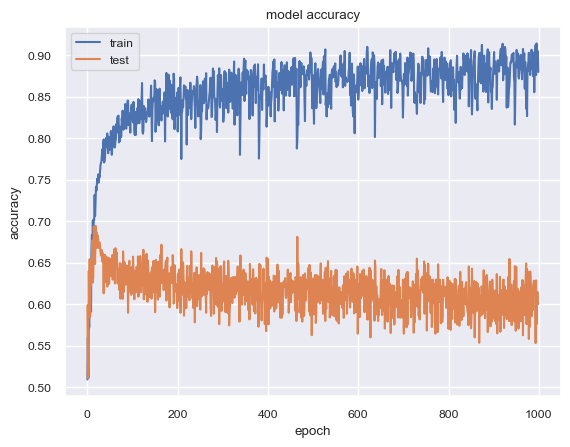

In [236]:
# summarize history for accuracy
plt.plot(ann_ros.history['accuracy'])
plt.plot(ann_ros.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

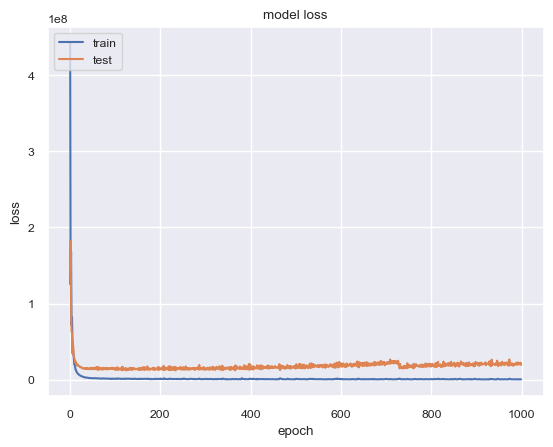

In [237]:
# summarize history for loss
plt.plot(ann_ros.history['loss'])
plt.plot(ann_ros.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

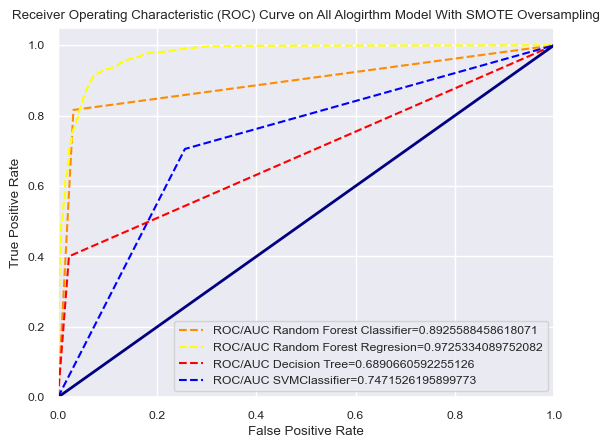

In [281]:
lw = 2

#create ROC curve
plt.plot(fpr_random_forest_sm,tpr_random_forest_sm,label="ROC/AUC Random Forest Classifier="+str(auc_random_forest_sm),color="darkorange",linestyle='--')
plt.plot(fpr_rf_reg_sm,tpr_rf_reg_sm,label="ROC/AUC Random Forest Regresion="+str(auc_rf_reg_sm),color="yellow",linestyle='--')
plt.plot(fpr_decision_tree_sm,tpr_decision_tree_sm,label="ROC/AUC Decision Tree="+str(auc_decision_tree_sm),color="red",linestyle='--')
plt.plot(fpr_svmc,tpr_svmc_sm,label="ROC/AUC SVMClassifier="+str(auc_svmc_sm),color="Blue",linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color="navy", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Receiver Operating Characteristic (ROC) Curve on All Alogirthm Model With SMOTE Oversampling")
plt.show()